In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
method_names = []
method_scores = []

# Synthetic Minority Over-sampling Technique for imbalanced data

In [ ]:
positive_class = pd.read_csv ('/content/drive/MyDrive/positive_class_cme_csv.csv')
positive_class=positive_class.iloc[:,4:22]

In [ ]:
negative_class = pd.read_csv ('/content/drive/MyDrive/negative_class_cme_csv.csv')
negative_class=negative_class.iloc[:,4:22]

In [ ]:
positive_class.columns

Index(['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,',
       'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,',
       'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


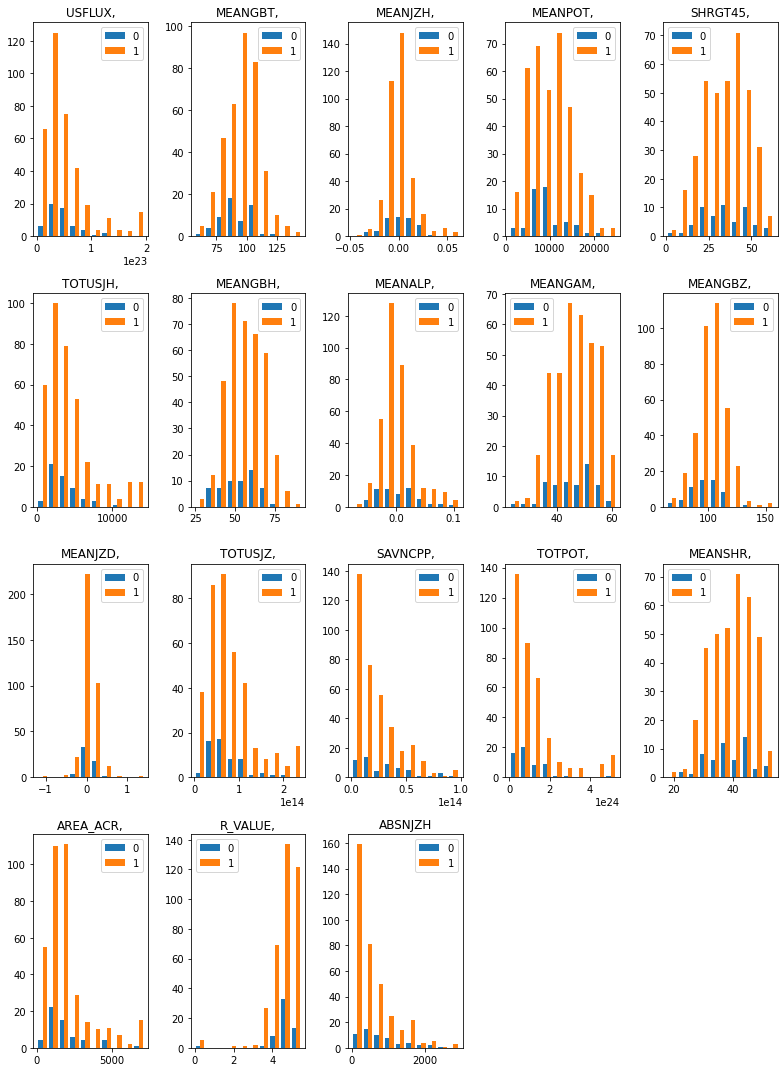

In [ ]:
##plotting the histogram of the feature
import matplotlib.pyplot as plt
plt.figure(figsize=(11,15))
for i in range(1,19):
  plt.subplot(4,5,i)
  plt.hist([positive_class.iloc[:,i-1],negative_class.iloc[:,i-1]],label=[0,1])
  plt.title(negative_class.columns[i-1])
  plt.legend()
  plt.tight_layout()


In [ ]:
def normalize_the_data(flare_data):
    flare_data = np.array(flare_data)
    n_elements = flare_data.shape[0]
    for j in range(flare_data.shape[1]):
        standard_deviation_of_this_feature = np.std(flare_data[:,j])
        median_of_this_feature = np.median(flare_data[:,j])
        for i in range(n_elements):
            flare_data[i,j] = (flare_data[i,j] - median_of_this_feature) / (standard_deviation_of_this_feature)
    return flare_data

no_CME_data = normalize_the_data(negative_class)
CME_data = normalize_the_data(positive_class)

In [ ]:
import numpy as np, matplotlib.pylab as plt, matplotlib.mlab as mlab, pandas as pd, requests, urllib, json
from datetime import datetime as dt_obj
from datetime import timedelta
#from sklearn import svm

from sklearn.model_selection import StratifiedKFold, KFold
#from sunpy.time import TimeRange
#import sunpy.instr.goes
from scipy.stats import pearsonr as pearse
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [ ]:
Nfl = CME_data.shape[0]; Nnofl = no_CME_data.shape[0]
number_of_examples = Nfl + Nnofl

In [ ]:
def confusion_table(pred, labels):
    """
    computes the number of TP, TN, FP, FN events given the arrays with predictions and true labels
    and returns the true skill score
  
    Args:
    pred: np array with predictions (1 for flare, 0 for nonflare)
    labels: np array with true labels (1 for flare, 0 for nonflare)
  
    Returns: true negative, false positive, true positive, false negative
    """  
    Nobs = len(pred)
    TN = 0.; TP = 0.; FP = 0.; FN = 0.
    for i in range(Nobs):
        if (pred[i] == 0 and labels[i] == 0):
            TN += 1
        elif (pred[i] == 1 and labels[i] == 0):
            FP += 1
        elif (pred[i] == 1 and labels[i] == 1):
            TP += 1 
        elif (pred[i] == 0 and labels[i] == 1):
            FN += 1
        else:
            print ("Error! Observation could not be classified.")
    return TN,FP,TP,FN

In [ ]:
from collections import Counter


In [ ]:
##making labels for data
pred = -np.ones(number_of_examples)
xdata = np.concatenate((CME_data, no_CME_data), axis=0)
ydata = np.concatenate((np.ones(Nfl), np.zeros(Nnofl)), axis=0)
shuffle_index = np.arange(number_of_examples)                  # shuffle the data indices 
np.random.shuffle(shuffle_index)



In [ ]:
##reading newly generated data
xdata=pd.read_csv("/content/xdata.csv")
ydata=pd.read_csv("/content/ydata.csv")
##drop index column
del xdata['Unnamed: 0']
del ydata['Unnamed: 0']
xdata=np.array(xdata).reshape(len(xdata),18)
ydata=np.array(ydata).reshape(len(ydata)

In [ ]:
,)

In [ ]:
##after GAN
shuffle_index = np.arange(len(ydata))                  # shuffle the data indices 
np.random.shuffle(shuffle_index)
ydata_shuffled = ydata[shuffle_index]
xdata_shuffled = xdata[shuffle_index,:]

In [ ]:
xdata_shuffled.columns

AttributeError: ignored

##DONOT RUN

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( xdata_shuffled, ydata_shuffled, test_size=0.2,stratify=ydata_shuffled)
col=['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,',
       'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,',
       'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH']
import xgboost as xgb
def XGB_test(x_train,y_train):
dtrain = xgb.DMatrix(x_train,y_train, feature_names=col)
dtest = xgb.DMatrix(x_test,y_test, feature_names=col)
# Run the xgboost algorithm, maximize recall on the test set
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import xgboost as xgb

import pickle

import gc
gc.collect()

from sklearn.metrics import recall_score, precision_score, roc_auc_score

def recall(preds, dtrain):
    labels = dtrain.get_label()
    return 'recall',  recall_score(labels, np.round(preds))

def precision(preds, dtrain):
    labels = dtrain.get_label()
    return 'precision',  precision_score(labels, np.round(preds))

def roc_auc(preds, dtrain):
    labels = dtrain.get_label()
    return 'roc_auc',  roc_auc_score(labels, preds)
results_dict = {}


xgb_params = {
#     'max_depth': 4,
    'objective': 'binary:logistic',
    'random_state': 0,
    'eval_metric': 'auc', # auc, error
#     'tree_method': 'hist'
#     'grow_policy': 'lossguide' # depthwise, lossguide
}

xgb_test = xgb.train(xgb_params, dtrain, num_boost_round=50, 
                     verbose_eval=False,
                     early_stopping_rounds=10, 
                     evals=[(dtrain,'train'),(dtest,'test')],
                     evals_result = results_dict,              
                     feval = recall, maximize=True
#                      feval = roc_auc, maximize=True
                    )

y_pred = xgb_test.predict(dtest, ntree_limit=xgb_test.best_iteration+1)
#y_true = y_test
print( 'best iteration: ', xgb_test.best_iteration )
print( recall( y_pred, dtest ) )
print( precision( y_pred, dtest ) )
print( roc_auc( y_pred, dtest ) )
# print( 'Accuracy: {:.3f}'.format(SimpleAccuracy(y_pred, y_true)) )
#SimpleMetrics( np.round(y_pred), y_test)
for i in results_dict:
    for err in results_dict[i]:
        plt.plot(results_dict[i][err], label=i+' '+err)   
plt.axvline(xgb_test.best_iteration, c='green', label='best iteration')
plt.xlabel('iteration')
# plt.ylabel(err)
plt.title('xgboost learning curves')
plt.legend()
plt.grid() ;

['MEANGAM,', 0.103504024]
['ABSNJZH', 0.09780139]
['MEANALP,', 0.08054859]
['TOTPOT,', 0.070655756]
['MEANJZH,', 0.066917226]
['MEANSHR,', 0.06272667]
['MEANGBT,', 0.060951445]
['MEANPOT,', 0.06013048]
['AREA_ACR,', 0.060070973]
['USFLUX,', 0.05706699]
['R_VALUE,', 0.056853216]
['MEANGBH,', 0.046750456]
['TOTUSJH,', 0.04258027]
['SHRGT45,', 0.03772444]
['MEANJZD,', 0.036777467]
['MEANGBZ,', 0.020128017]
['TOTUSJZ,', 0.019539358]
['SAVNCPP,', 0.019273313]


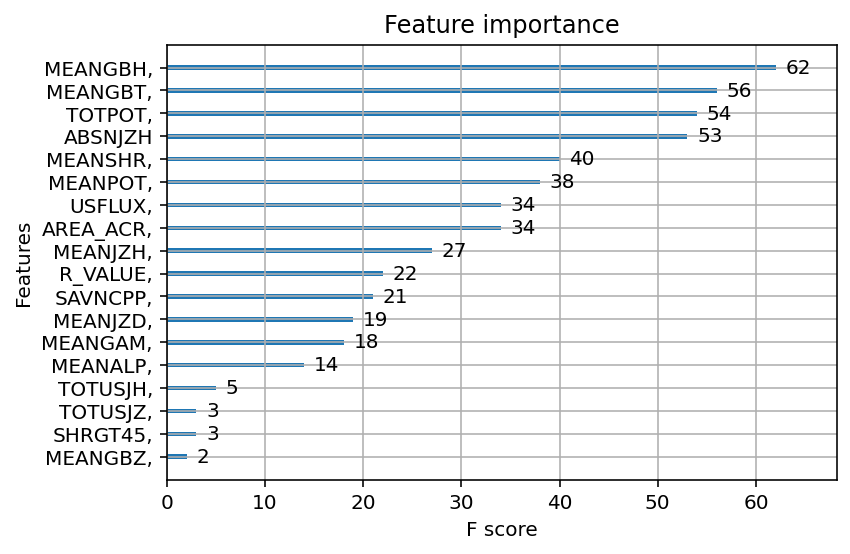

NameError: ignored

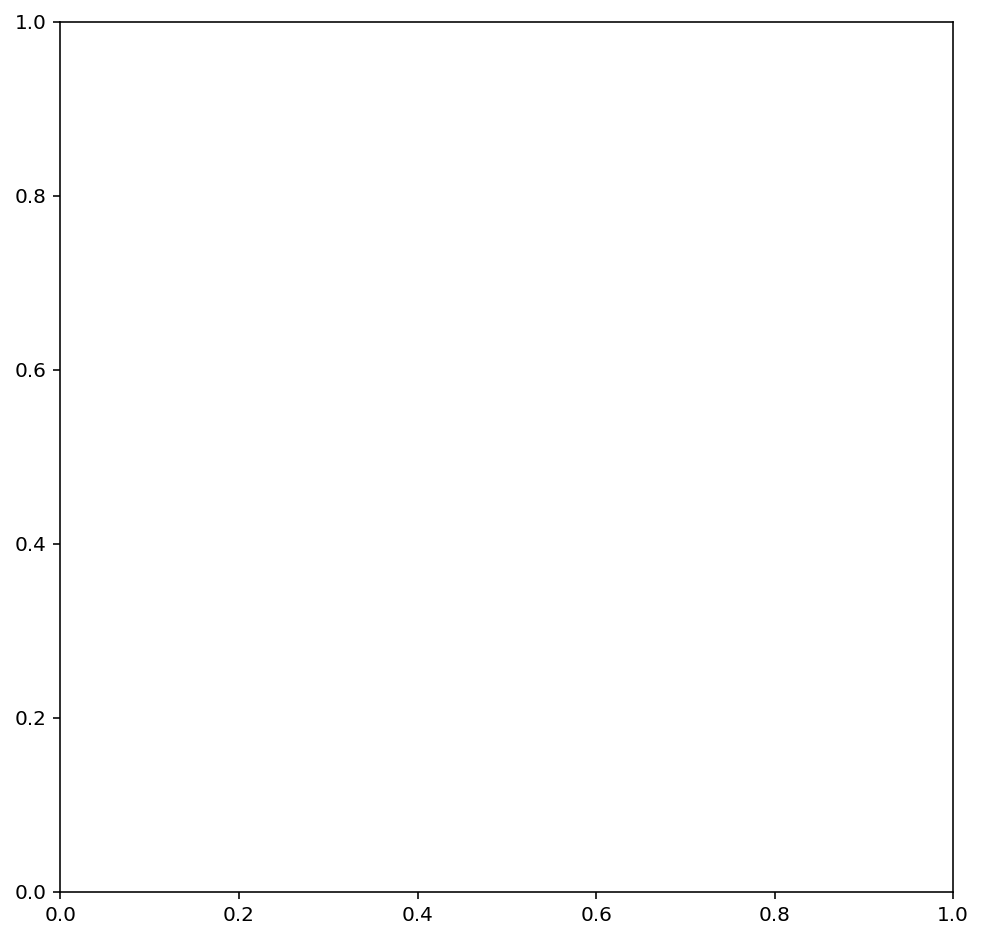

In [ ]:
##feature importance
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance
model = XGBClassifier()
col=['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,',
       'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,',
       'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH']
xdata_shuffled1=pd.DataFrame(xdata_shuffled, columns = col)
model.fit(xdata_shuffled1, ydata_shuffled)
sorted_idx = np.argsort(model.feature_importances_)[::-1]
for index in sorted_idx:
    print([col[index], model.feature_importances_[index]]) 
plot_importance(model, max_num_features = 19)
plt.show()
#pd.DataFrame(bst.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False)
# Plot feature importances

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
xgb.plot_importance(xgb_test, max_num_features=18, height=0.5, ax=ax);

In [ ]:
#sorted_columns
xdata_shuffled2=xdata_shuffled1[['MEANGBH,','MEANGBT,','TOTPOT,', 'ABSNJZH', 'MEANSHR,','MEANPOT,','USFLUX,', 'AREA_ACR,',
                                'MEANJZH,','R_VALUE,','SAVNCPP,','MEANJZD,','MEANGAM,','MEANALP,','TOTUSJH,','TOTUSJZ,','SHRGT45,','MEANGBZ,']]

In [ ]:
data_whole = pd.concat([pd.DataFrame(xdata_shuffled2),pd.DataFrame(ydata_shuffled)],axis=1)


In [ ]:
data_whole.columns=[['MEANGBH,','MEANGBT,','TOTPOT,', 'ABSNJZH', 'MEANSHR,','MEANPOT,','USFLUX,', 'AREA_ACR,',
                                'MEANJZH,','R_VALUE,','SAVNCPP,','MEANJZD,','MEANGAM,','MEANALP,','TOTUSJH,','TOTUSJZ,','SHRGT45,','MEANGBZ,','class']]

In [ ]:
data_whole.iloc[:,:]

,"MEANGBH,","MEANGBT,","TOTPOT,",ABSNJZH,"MEANSHR,","MEANPOT,","USFLUX,","AREA_ACR,","MEANJZH,","R_VALUE,","SAVNCPP,","MEANJZD,","MEANGAM,","MEANALP,","TOTUSJH,","TOTUSJZ,","SHRGT45,","MEANGBZ,",class
0,0.498912,0.010721,0.304870,-0.464803,1.131270,1.346238,-0.060707,-0.025348,-0.002503,-0.133944,-0.549999,0.313318,1.062469,0.036947,-0.139966,-0.208494,1.229336,0.101256,0.0
1,0.367553,0.885555,0.000415,-0.263058,-0.356565,-0.888015,0.439234,0.716804,-0.023521,-0.089520,-0.529629,-0.687942,-0.162743,-0.073346,0.426096,0.600728,-0.285997,0.508495,0.0
2,-0.445863,0.247165,-0.331416,-0.180122,-0.389463,-0.910390,-0.377337,-0.357911,0.588793,-0.306254,-0.317268,0.442256,-0.356100,0.921490,-0.496087,-0.404611,-0.468884,-0.034016,0.0
3,-0.312483,0.148051,0.854864,-0.441156,-0.002599,0.253152,1.297795,1.250072,0.026023,0.078848,-0.520012,-1.231304,-0.172960,0.020008,1.027450,1.005552,-0.002263,0.037378,1.0
4,0.947572,1.940430,-0.574234,-0.603550,-0.516106,-1.493306,-0.813476,-0.895460,0.387136,-2.028009,-0.636064,1.232081,0.188056,0.609177,-0.919097,-1.057320,-0.574659,1.553646,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,-0.406527,-0.159943,-0.347178,-0.107371,-1.158200,-1.104731,-0.155934,-0.424546,-0.319305,-0.228176,-0.316249,-0.952365,-0.919075,-0.407914,-0.313461,-0.393187,-1.072046,-0.069851,0.0
416,-1.070179,-0.470162,0.227719,-0.155096,-1.227344,-0.893984,1.122488,0.862951,-0.010883,-0.178368,-0.370740,-0.085684,-1.092818,-0.037372,0.582269,0.760668,-1.139145,-0.761160,0.0
417,-0.648435,0.108076,-0.194756,1.548526,-0.830546,-0.627866,0.180147,-0.090342,1.257632,0.160513,1.308697,0.010720,-1.050970,1.553575,0.468899,0.169703,-0.884737,0.155234,1.0
418,0.125134,0.328281,0.255095,1.129629,-0.373305,-0.063827,0.470183,0.444071,-0.749226,0.326447,1.800228,-0.465827,-0.379027,-0.762304,0.396700,0.400803,-0.435375,0.501059,0.0


In [ ]:
##making bar chart_features
import plotly.graph_objects as go
features=['MEANGBH,','MEANGBT,','TOTPOT,', 'ABSNJZH', 'MEANSHR,','MEANPOT,','USFLUX,', 'AREA_ACR,',
                                'MEANJZH,','R_VALUE,','SAVNCPP,','MEANJZD,','MEANGAM,','MEANALP,','TOTUSJH,','TOTUSJZ,','SHRGT45,','MEANGBZ,']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()

In [ ]:
# Grouped bar plot with seaborn
import seaborn as sns
features=['MEANGBH,','MEANGBT,','TOTPOT,', 'ABSNJZH', 'MEANSHR,','MEANPOT,','USFLUX,', 'AREA_ACR,',
                                'MEANJZH,','R_VALUE,','SAVNCPP,','MEANJZD,','MEANGAM,','MEANALP,','TOTUSJH,','TOTUSJZ,','SHRGT45,','MEANGBZ,']

sns.barplot(y=data_whole.iloc[:,0:17].values,x=features,hue=data_whole[['class']],data=data_whole.iloc[:,0:17].values);

AttributeError: ignored

In [ ]:
data_whole.iloc[:,0:17].values

array([[ 4.98911818e-01,  1.07210083e-02,  3.04869919e-01, ...,
        -1.39965834e-01, -2.08493617e-01,  1.22933628e+00],
       [ 3.67552757e-01,  8.85555289e-01,  4.14789005e-04, ...,
         4.26096153e-01,  6.00728185e-01, -2.85997314e-01],
       [-4.45862967e-01,  2.47164670e-01, -3.31416415e-01, ...,
        -4.96086933e-01, -4.04610901e-01, -4.68883794e-01],
       ...,
       [-6.48435274e-01,  1.08075560e-01, -1.94756075e-01, ...,
         4.68898922e-01,  1.69702668e-01, -8.84736837e-01],
       [ 1.25133941e-01,  3.28280910e-01,  2.55095238e-01, ...,
         3.96700218e-01,  4.00802798e-01, -4.35374792e-01],
       [-1.94332017e-01, -1.04775143e-01,  3.58999884e+00, ...,
         3.25088430e+00,  3.29305672e+00,  2.28103447e-01]])

In [ ]:
#loading genrator weights
# Let's look at some of the generated data
# First create the networks locally and load the weights
import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *
def load_weights():


  seed = 17
  train_c = fraud_w_classes.copy().reset_index(drop=True) # fraud only with labels from classification

  # train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
  label_cols = [ i for i in train_c.columns if 'Class' in i ]
  data_cols = [ i for i in train_c.columns if i not in label_cols ]
  train_c[ data_cols ] = train_c[ data_cols ] / 10 # scale to random noise size, one less thing to learn
  train_no_label = train_c[ data_cols ]



  data_dim = len(data_cols)
  label_dim = len(label_cols)
  with_class = False
  if label_dim > 0: with_class = True
  np.random.seed(seed)

  # define network models

  # generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count, type='Wasserstein')
  # generator_model.load_weights('cache/WCGAN_generator_model_weights_step_4800.h5')
  generator_model, discriminator_model, combined_model = define_models_CGAN(rand_dim, data_dim, label_dim, base_n_count)
  generator_model.load_weights('/content/CGAN_generator_model_weights_step_500.h5')
  return generator_model

In [ ]:
# reloading the libraries and setting the parameters


import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *
def GAN_generated(X_train,y_train):
  train = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
  train.columns=['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,',
        'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,',
        'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH','Class']
  train_n = train.loc[ train['Class']==1 ].copy()
  fraud_w_classes = train_n.copy()
  fraud_w_classes['Class']

  rand_dim = 18 # 32 # needs to be ~data_dim
  base_n_count = 64 # 128

  nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
  batch_size = 64 # 64

  k_d = 1  # number of critic network updates per adversarial training step
  k_g = 1  # number of generator network updates per adversarial training step
  critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
  log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
  learning_rate = 5e-4 # 5e-5
  data_dir = '/content/'
  generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

  # show = False
  show = True 

  # train = create_toy_spiral_df(1000)
  # train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)

  train_c = fraud_w_classes.copy().reset_index(drop=True) # fraud only with labels from classification

  # train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
  label_cols = [ i for i in train_c.columns if 'Class' in i ]
  data_cols = [ i for i in train_c.columns if i not in label_cols ]
  train_c[ data_cols ] = train_c[ data_cols ] / 10 # scale to random noise size, one less thing to learn
  train_no_label = train_c[ data_cols ]
  %%time

  # Training the vanilla GAN and CGAN architectures

  k_d = 1  # number of critic network updates per adversarial training step
  learning_rate = 5e-4 # 5e-5
  label_dim=1
  arguments = [rand_dim, nb_steps, batch_size, 
              k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
              data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

  adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
  adversarial_training_GAN(arguments, train_c, data_cols=data_cols, label_cols=label_cols ) # CGAN
  prefix = 'CGAN'
  step = 500

  [combined_loss, disc_loss_generated, disc_loss_real, xgb_losses] = pickle.load(
      open(data_dir+prefix+'_losses_step_'+str(step)+'.pkl','rb'))
  # plt.plot( xgb_losses[:] ) ;
  w = 10
  plt.plot( pd.DataFrame(xgb_losses[:]).rolling(w).mean() ) ;
  # Look for the step with the lowest xgboost accuracy, and the lowest step saved (every 100)

  best_step = list(xgb_losses).index( xgb_losses.min() ) * 10
  print( best_step, xgb_losses.min() )

  xgb100 = [ xgb_losses[i] for i in range(0, len(xgb_losses), 10) ]
  best_step = xgb100.index( min(xgb100) ) * log_interval
  print( best_step, min(xgb100) )
  # Look for the step with the lowest critic loss, and the lowest step saved (every 100)

  delta_losses = np.array(disc_loss_real) - np.array(disc_loss_generated)

  best_step = list(delta_losses).index( delta_losses.min() )
  print( best_step, delta_losses.min() )

  delta100 = [ delta_losses[i] for i in range(0, len(delta_losses), 100) ]
  best_step = delta100.index( min(delta100) ) * log_interval
  print( best_step, min(delta100) )

  #generate new data
  #generating new data
  # Now generate some new data
  generator_model=load_weights()

  test_size = 56 # Equal to all of the fraud cases

  x = get_data_batch(train_c, test_size, seed=17)
  z = np.random.normal(size=(test_size, rand_dim))
  if with_class:
      labels = x[:,-label_dim:]
      g_z = generator_model.predict([z, labels])
  else:
      g_z = generator_model.predict(z)
  return x,g_z

In [ ]:
# reloading the libraries and setting the parameters


import GAN_171103
import importlib
importlib.reload(GAN_171103) # For reloading after making changes
from GAN_171103 import *
def GAN(X_train,y_train):
  train = pd.concat([pd.DataFrame(X_train),pd.DataFrame(y_train)],axis=1)
  train.columns=['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,',
        'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,',
        'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH','Class']
  train_n = train.loc[ train['Class']==1 ].copy()
  fraud_w_classes = train_n.copy()
  fraud_w_classes['Class']

  rand_dim = 18 # 32 # needs to be ~data_dim
  base_n_count = 64 # 128

  nb_steps = 500 + 1 # 50000 # Add one for logging of the last interval
  batch_size = 64 # 64

  k_d = 1  # number of critic network updates per adversarial training step
  k_g = 1  # number of generator network updates per adversarial training step
  critic_pre_train_steps = 100 # 100  # number of steps to pre-train the critic before starting adversarial training
  log_interval = 100 # 100  # interval (in steps) at which to log loss summaries and save plots of image samples to disc
  learning_rate = 5e-4 # 5e-5
  data_dir = '/content/'
  generator_model_path, discriminator_model_path, loss_pickle_path = None, None, None

  # show = False
  show = True 

  # train = create_toy_spiral_df(1000)
  # train = create_toy_df(n=1000,n_dim=2,n_classes=4,seed=0)

  train_c = fraud_w_classes.copy().reset_index(drop=True) # fraud only with labels from classification

  # train = pd.get_dummies(train, columns=['Class'], prefix='Class', drop_first=True)
  label_cols = [ i for i in train_c.columns if 'Class' in i ]
  data_cols = [ i for i in train_c.columns if i not in label_cols ]
  train_c[ data_cols ] = train_c[ data_cols ] / 10 # scale to random noise size, one less thing to learn
  train_no_label = train_c[ data_cols ]
  %%time

  # Training the vanilla GAN and CGAN architectures

  k_d = 1  # number of critic network updates per adversarial training step
  learning_rate = 5e-4 # 5e-5
  label_dim=1
  arguments = [rand_dim, nb_steps, batch_size, 
              k_d, k_g, critic_pre_train_steps, log_interval, learning_rate, base_n_count,
              data_dir, generator_model_path, discriminator_model_path, loss_pickle_path, show ]

  adversarial_training_GAN(arguments, train_no_label, data_cols ) # GAN
  adversarial_training_GAN(arguments, train_c, data_cols=data_cols, label_cols=label_cols ) # CGAN
  prefix = 'CGAN'
  step = 500

  [combined_loss, disc_loss_generated, disc_loss_real, xgb_losses] = pickle.load(
      open(data_dir+prefix+'_losses_step_'+str(step)+'.pkl','rb'))
  # plt.plot( xgb_losses[:] ) ;
  w = 10
  plt.plot( pd.DataFrame(xgb_losses[:]).rolling(w).mean() ) ;
  # Look for the step with the lowest xgboost accuracy, and the lowest step saved (every 100)

  best_step = list(xgb_losses).index( xgb_losses.min() ) * 10
  print( best_step, xgb_losses.min() )

  xgb100 = [ xgb_losses[i] for i in range(0, len(xgb_losses), 10) ]
  best_step = xgb100.index( min(xgb100) ) * log_interval
  print( best_step, min(xgb100) )
  # Look for the step with the lowest critic loss, and the lowest step saved (every 100)

  delta_losses = np.array(disc_loss_real) - np.array(disc_loss_generated)

  best_step = list(delta_losses).index( delta_losses.min() )
  print( best_step, delta_losses.min() )

  delta100 = [ delta_losses[i] for i in range(0, len(delta_losses), 100) ]
  best_step = delta100.index( min(delta100) ) * log_interval
  print( best_step, min(delta100) )

  #generate new data
  #generating new data
  # Now generate some new data
  generator_model=load_weights()

  test_size = 56 # Equal to all of the fraud cases

  x = get_data_batch(train_c, test_size, seed=17)
  z = np.random.normal(size=(test_size, rand_dim))
  if with_class:
      labels = x[:,-label_dim:]
      g_z = generator_model.predict([z, labels])
  else:
      g_z = generator_model.predict(z)
  return x,g_z

In [ ]:
    ##model to be tried for sampling
    ##undersampling majority class
    def RUS(X_train,y_train):
      rus= RandomUnderSampler(random_state=0)
      rus.fit(X_train,y_train)
      X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
      return X_resampled, y_resampled
    def ROS(X_train,y_train):
      ros=RandomOverSampler(random_state=0)
      ros.fit(X_train,y_train)
      X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
      return X_resampled, y_resampled
    ##SMOTE
    def SMOTE_test(X_train,y_train):
      oversample = SMOTE()
      X_resampled, y_resampled = oversample.fit_resample(X_train,y_train)
      return X_resampled, y_resampled

    #GAN
    #generating samples
    def GAN_generated(X_train,y_train):
      x,g_z= GAN(X_train,y_train)
      print( CheckAccuracy( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim ) )
      #PlotData( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim )
      xdata=np.append([X_train],[x[:,0:18]],axis=1)
      ydata=np.append([y_train],[x[:,-1]],axis=1)
    ##after GAN
      shuffle_index = np.arange(len(ydata))
      np.random.shuffle(shuffle_index) 
      y_resampled = ydata[shuffle_index]
      X_resampled = xdata[shuffle_index,:]
      return (X_sampled,y_resampled)
    #

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs
data_dim:  18
data_cols:  ['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,', 'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,', 'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH']


/usr/local/lib/python3.7/dist-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dense_3 (Dense)             (None, 18)                4626      
                                                                 
Total params: 47,186
Trainable params: 47,186
Non-trainable params: 0
_________________________________________________________________
None
Model: "discriminator"
_________________________

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


None
Step: 0 of 501.
Losses: G, D Gen, D Real, Xgb: 0.6726, 0.7240, 0.6851, 0.9107
D Real - D Gen: -0.0389


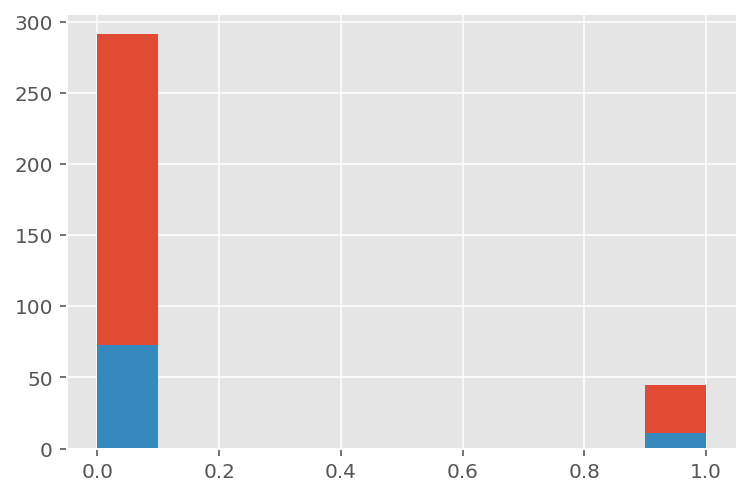

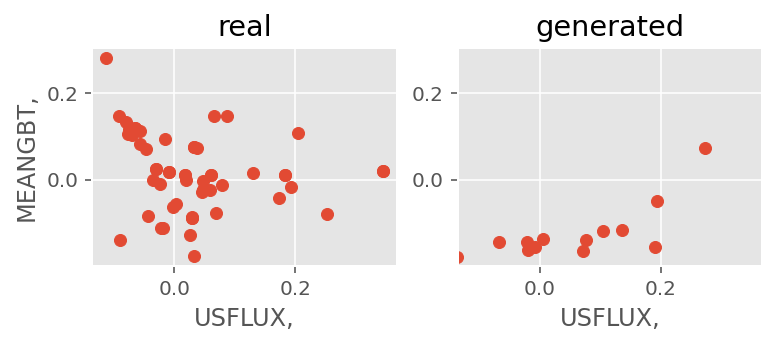

ValueError: ignored

In [ ]:
##predicting test
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
method=[svm,XGboost,RF,DT,LR,Bayes,Adaboost,KNN,LDA,GB]
for model in method:
  Tss=[]
  lracc=[]
  prec=[]
  rec=[]
  fscore=[]
  roc_auc=[]
  for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(xdata_shuffled, ydata_shuffled, test_size=0.2,stratify=ydata_shuffled)
    plt.hist(y_train)
    plt.hist(y_test)
    ##model to be tried for sampling
    ##undersampling majority class
    X_resampled,y_resampled=RUS(X_train,y_train)
    ##oversampling minority class
    X_resampled,y_resampled=ROS(X_train,y_train)
    ##SMOTE
    X_resampled,y_resampled=SMOTE_test(X_train,y_train)
    ##GAN
    X_resampled,y_resampled=GAN_generated(X_train,y_train)


  #########Donot use this###########################################
    #rus= RandomUnderSampler(random_state=0)
    #rus.fit(X_train,y_train)
    #X_resampled, y_resampled = rus.fit_resample(X_train,y_train)
    #ros=RandomOverSampler(random_state=0)
    #ros.fit(X_train,y_train)
    #X_resampled, y_resampled = ros.fit_resample(X_train,y_train)
    ##SMOTE
    #oversample = SMOTE()
    #X_resampled, y_resampled = oversample.fit_resample(X_train,y_train)
    #GAN
    #generating samples
    #def GAN_generated():
    # g_z= GAN(X_train,y_train)
    # print( CheckAccuracy( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim ) )
    # PlotData( x, g_z, data_cols, label_cols, seed=0, with_class=with_class, data_dim=data_dim )
    # xdata=np.append([X_train],[x[:,0:18]],axis=1)
    # ydata=np.append([y_train],[x[:,-1]],axis=1)
    ##after GAN
      #shuffle_index = np.arange(len(ydata))
      #np.random.shuffle(shuffle_index) 
      #y_resampled = ydata[shuffle_index]
      #X_resampled = xdata[shuffle_index,:]
      #return (X_sampled,y_resampled)
    #X_resampled,y_resampled=GAN_generated()
    



    model.fit(X_resampled,y_resampled)
    pred =model.predict(X_test)
    confusion_matrix(y_test,pred.reshape(-1,1))
    TN,FP,TP,FN = confusion_table(pred, y_test)
    Tss.append((TP/(TP+FN) - FP/(FP+TN)))
    lracc.append(accuracy_score(y_test, pred))
    prec.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))
    fscore.append(f1_score(y_test,pred))
    roc_auc.append(roc_auc_score(y_test,pred))
  print("model_name=",model)
  print('flares w/o cME(TN),FP(pred:1,act:0),flares wth CME(TP),FN(pred:0,act:1)',TN,FP,TP,FN)
  print("The TSS equals",round(np.mean(Tss),2),'+/-',round(np.std(Tss),2))
  print("accscore:",round(np.mean(lracc),2),'+/-',round(np.std(lracc),2))
  print("Precision:",round(np.mean(prec),2),'+/-',round(np.std(prec),2))
  print("REcall:",round(np.mean(rec),2),'+/-',round(np.std(rec),2))
  print("F1score:",round(np.mean(fscore),2),'+/-',round(np.std(fscore),2))
  print("ROC_AUC:",round(np.mean(roc_auc),2),'+/-',round(np.std(roc_auc),2))

In [ ]:
new_generated_data=x[:,0:18]x[:,0:18]

In [ ]:
xdata=np.append([xdata],[x[:,0:18]],axis=1)
ydata=np.append([ydata],[x[:,-1]],axis=1)
##after GAN
shuffle_index = np.arange(len(ydata))
np.random.shuffle(shuffle_index) 
ydata_shuffled = ydata[shuffle_index]
xdata_shuffled = xdata[shuffle_index,:]

In [ ]:
xdata=xdata.reshape(476,18)
ydata=ydata.reshape(476,)

In [ ]:
import pandas as pd 
pd.DataFrame(xdata).to_csv("/content/xdata.csv")
pd.DataFrame(ydata).to_csv("/content/ydata.csv")

In [ ]:
##after GAN
shuffle_index = np.arange(len(ydata))
np.random.shuffle(shuffle_index) 
ydata_shuffled = ydata[shuffle_index]
xdata_shuffled = xdata[shuffle_index,:]

In [ ]:
xdata_shuffled.shape

(476, 18)

In [ ]:
##Try ML model with GAN added data

##training and tessting metrics

def model_name(model,bt,xdata_shuffled,ydata_shuffled):
  these_TSS_for_this_k = []
  lraccs=[]
  recs=[]
  precs=[]
  recs=[]
  TSS_k1_mean=[]
  TSS_k1_std=[]
  fscore=[]
  roc_auc=[]
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score
  from sklearn.metrics import f1_score
  from sklearn.metrics import roc_curve
  from sklearn.metrics import roc_auc_score
  skf = StratifiedKFold(n_splits=10)
  for k,(j,i) in enumerate(skf.split(xdata_shuffled,ydata_shuffled)):
      train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
      model.fit(train, ytrain)
      if bt==0:
        pred = model.predict(test)
      else:
        pred = (model.predict_proba(test)[:,1] >= bt).astype(bool)
      TN,FP,TP,FN = confusion_table(pred, ydata_shuffled[i])
      if (((TP+FN) == 0.0) or (FP+TN)==0.0):
          these_TSS_for_this_k.append(-1.0)
          continue
      else:
          these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
      print(TN,FP,TP,FN)
      lracc = accuracy_score(ytest, pred)
      prec = precision_score(ytest, pred)
      rec = recall_score(ytest, pred)
      lraccs.append(lracc)
      precs.append(prec)
      recs.append(rec)
      
      fscore.append(f1_score(ytest,pred))
      roc_auc.append(roc_auc_score(ytest,pred))
  TSS_k = np.array(these_TSS_for_this_k)

  array_of_avg_TSS=np.mean(TSS_k)
  array_of_std_TSS=np.std(TSS_k)
  TSS_k1_mean.append(array_of_avg_TSS)
  TSS_k1_std.append(array_of_std_TSS)
  print("model_name=",model)
  print("The TSS equals",round(array_of_avg_TSS,2),'+/-',round(array_of_std_TSS,2))
  lraccuracy = np.mean(lraccs)
  print("accscore:",round(np.mean(lraccs),2),'+/-',round(np.std(lraccs),2))
  print("Precision:",round(np.mean(precs),2),'+/-',round(np.std(precs),2))
  print("REcall:",round(np.mean(recs),2),'+/-',round(np.std(recs),2))
  print("F1score:",round(np.mean(fscore),2),'+/-',round(np.std(fscore),2))
  print("ROC_AUC:",round(np.mean(roc_auc),2),'+/-',round(np.std(roc_auc),2))
  #plot_confusion_matrix(pred, ytest)
  print("1-with CME,0-without CME")


In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

import itertools
class_names=[0,1]

In [ ]:
#SVM
from sklearn import svm
C = 4.0; gamma = 0.075; class_weight = {1:6.5}
svm = svm.SVC(C=C, gamma=gamma,probability=True, kernel='rbf',class_weight=class_weight, cache_size=500, max_iter=-1, shrinking=True, tol=1e-8)
#XGBOOST
import xgboost as xgb
XGboost = xgb.XGBClassifier(objective="reg:logistic")
#RF
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,max_depth=2,class_weight='balanced')
#Decisiontree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(class_weight='balanced')

#Logisticregression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(class_weight='None')

#ELNET

from sklearn.linear_model import ElasticNet
ELNET=ElasticNet()

#Naivebayes
from sklearn.naive_bayes import GaussianNB
Bayes = GaussianNB()

#Adaboost

from sklearn.ensemble import AdaBoostClassifier
Adaboost=AdaBoostClassifier(n_estimators=100)

#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)

#Balanced bagging
from imblearn.ensemble import BalancedBaggingClassifier 
Balancedbagging = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,sampling_strategy='auto',replacement=False)

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=1)

#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1)



In [ ]:
method=[svm,XGboost,RF,DT,LR,Bayes,Adaboost,KNN,LDA,GB]

In [ ]:
for i in method:
  model_name(i,0,xdata_shuffled,ydata_shuffled)
  

In [ ]:
print(shuffle_index)
len(ydata)

None


476

In [ ]:
arr = np.arange(10)
np.random.shuffle(arr)
arr

array([7, 1, 9, 4, 2, 3, 0, 5, 8, 6])

In [ ]:
# Now we can train and test an xgboost classifier on our generated data

real_samples = pd.DataFrame(x, columns=data_cols+label_cols)
test_samples = pd.DataFrame(g_z, columns=data_cols+label_cols)
real_samples['syn_label'] = 0
test_samples['syn_label'] = 1

training_fraction = 0.5
n_real, n_test = int(len(real_samples)*training_fraction), int(len(test_samples)*training_fraction)
train_df = pd.concat([real_samples[:n_real],test_samples[:n_test]],axis=0)
test_df = pd.concat([real_samples[n_real:],test_samples[n_test:]],axis=0)

# X_col = test_df.columns[:-(label_dim+1)]
X_col = test_df.columns[:-1]
y_col = test_df.columns[-1]
dtrain = xgb.DMatrix(train_df[X_col], train_df[y_col], feature_names=X_col)
dtest = xgb.DMatrix(test_df[X_col], feature_names=X_col)
y_true = test_df['syn_label']

# dtrain = np.vstack( [ x[:int(len(x)/2)], g_z[:int(len(g_z)/2)] ] )
# dlabels = np.hstack( [ np.zeros(int(len(x)/2)), np.ones(int(len(g_z)/2)) ] )
# dtest = np.vstack( [ x[int(len(x)/2):], g_z[int(len(g_z)/2):] ] )

# dtrain = xgb.DMatrix(dtrain, dlabels, feature_names=data_cols+label_cols)
# dtest = xgb.DMatrix(dtest, feature_names=data_cols+label_cols)
# y_true = dlabels

xgb_params = {
    'max_depth': 4,
    'objective': 'binary:logistic',
    'random_state': 0,
    'eval_metric': 'auc', # allows for balanced or unbalanced classes 
}
xgb_test = xgb.train(xgb_params, dtrain, num_boost_round=10)

y_pred = np.round(xgb_test.predict(dtest))

print( '{:.2f}'.format(SimpleAccuracy(y_pred, y_true)) )

In [ ]:
Nfl1 = positive_class.shape[0]; Nnofl1 = negative_class.shape[0]
ne = Nfl1 + Nnofl1

In [ ]:

xdata1 = pd.concat((positive_class, negative_class), axis=0)
#positive_class.shape
xdata.columns

AttributeError: ignored

In [ ]:
xdata1=pd.DataFrame(xdata)
xdata1.columns =['USFLUX,', 'MEANGBT,', 'MEANJZH,', 'MEANPOT,', 'SHRGT45,', 'TOTUSJH,',
       'MEANGBH,', 'MEANALP,', 'MEANGAM,', 'MEANGBZ,', 'MEANJZD,', 'TOTUSJZ,',
       'SAVNCPP,', 'TOTPOT,', 'MEANSHR,', 'AREA_ACR,', 'R_VALUE,', 'ABSNJZH']


In [ ]:
ydata.shape
datax=np.hstack((xdata,ydata.reshape(420,1)))

In [ ]:
datax

array([[-0.70955936,  1.02047662,  1.16243968, ...,  0.14643289,
         0.22488183,  1.        ],
       [-0.68750052,  0.00734724, -0.30600911, ..., -0.56038742,
        -0.90847013,  1.        ],
       [ 0.78308883, -0.12387608,  0.27362919, ...,  0.19852921,
         0.01537534,  1.        ],
       ...,
       [ 0.29639396, -0.88097615, -0.59574468, ...,  0.35606269,
         0.51338471,  0.        ],
       [ 0.13212743,  0.93745224,  0.56463636, ..., -0.26721529,
        -0.0016444 ,  0.        ],
       [ 0.2559225 ,  0.23873323,  0.46088637, ..., -0.38702466,
        -0.07885646,  0.        ]])

In [ ]:
from sklearn import svm
C = 4.0; gamma = 0.075;
svm1 = svm.SVC(C=C, gamma=gamma,probability=True, kernel='rbf', cache_size=500, max_iter=-1, shrinking=True, tol=1e-8)


In [ ]:
#SVM
from sklearn import svm
C = 4.0; gamma = 0.075; class_weight = {1:6.5}
svm = svm.SVC(C=C, gamma=gamma,probability=True, kernel='rbf',class_weight=class_weight, cache_size=500, max_iter=-1, shrinking=True, tol=1e-8)
#XGBOOST
import xgboost as xgb
XGboost = xgb.XGBClassifier(objective="reg:logistic")
#RF
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,max_depth=2,class_weight='balanced')
#Decisiontree
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(class_weight='balanced')

#Logisticregression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(class_weight='None')

#ELNET

from sklearn.linear_model import ElasticNet
ELNET=ElasticNet()

#Naivebayes
from sklearn.naive_bayes import GaussianNB
Bayes = GaussianNB()

#Adaboost

from sklearn.ensemble import AdaBoostClassifier
Adaboost=AdaBoostClassifier(n_estimators=100)

#KNN
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)

#Balanced bagging
from imblearn.ensemble import BalancedBaggingClassifier 
Balancedbagging = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,sampling_strategy='auto',replacement=False)

#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis(n_components=1)

#Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1)



In [ ]:
method=[svm,XGboost,RF,DT,LR,Bayes,Adaboost,KNN,LDA,GB]

In [ ]:
def get_models():
	models = list()
	models.append(LogisticRegression())
	models.append(RidgeClassifier())
	models.append(SGDClassifier())
	models.append(PassiveAggressiveClassifier())
	models.append(KNeighborsClassifier())
	models.append(DecisionTreeClassifier())
	models.append(ExtraTreeClassifier())
	models.append(LinearSVC())
	models.append(SVC())
	models.append(GaussianNB())
	models.append(AdaBoostClassifier())
	models.append(BaggingClassifier())
	models.append(RandomForestClassifier())
	models.append(ExtraTreesClassifier())
	models.append(GaussianProcessClassifier())
	models.append(GradientBoostingClassifier())
	models.append(LinearDiscriminantAnalysis())
	models.append(QuadraticDiscriminantAnalysis())
	return models

In [ ]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')
    plt.show()

    # Plot normalized confusion matrix
    plt.figure()
    generate_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
    plt.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cnf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    return cnf_matrix

import itertools
class_names=[0,1]


In [ ]:
x_resampled,y_resampled=generate_fake_samples(generator, latent_dim, 100)

In [ ]:
def define_discriminator(n_inputs=18):
	model = Sequential()
	model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
def define_generator(latent_dim, n_outputs=1):
	model = Sequential()
	model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
	model.add(Dense(n_outputs, activation='linear'))
	return model

In [ ]:
model=define_generator(18)
model.summary()
model1=define_discriminator()
model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 15)                285       
                                                                 
 dense_15 (Dense)            (None, 1)                 16        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 25)                475       
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 501
Trainable params

In [ ]:
##plotting the histogram of the feature
import matplotlib.pyplot as plt
plt.figure(figsize=(11,15))
for i in range(1,19):
  plt.subplot(4,5,i)
  plt.hist([positive_class.iloc[:,i-1],negative_class.iloc[:,i-1]],label=[0,1])
  plt.title(negative_class.columns[i-1])
  plt.legend()
  plt.tight_layout()


In [ ]:
#ROC Threshold Moving for Imbalanced Classification
best_thresh1=[]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def threshold_imbalance(model):
  skf = StratifiedKFold(n_splits=10)
  for k,(j,i) in enumerate(skf.split(xdata_shuffled,ydata_shuffled)):
      train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
      model.fit(train, ytrain)
      pred = model.predict_proba(test)
      #y_pred = (model.predict_proba(test)[:,1] >= 0.6).astype(bool)
      yhat_positive = pred[:, 1]
      
      # calculate inputs for the roc curve
      fpr, tpr, thresholds = roc_curve(ytest, yhat_positive)

      
      from numpy import argmax

  # get the best threshold
      J = tpr - fpr
      ix = argmax(J)
      best_thresh = thresholds[ix]
      best_thresh1.append(best_thresh)
  bt=np.mean(best_thresh1)
  return bt




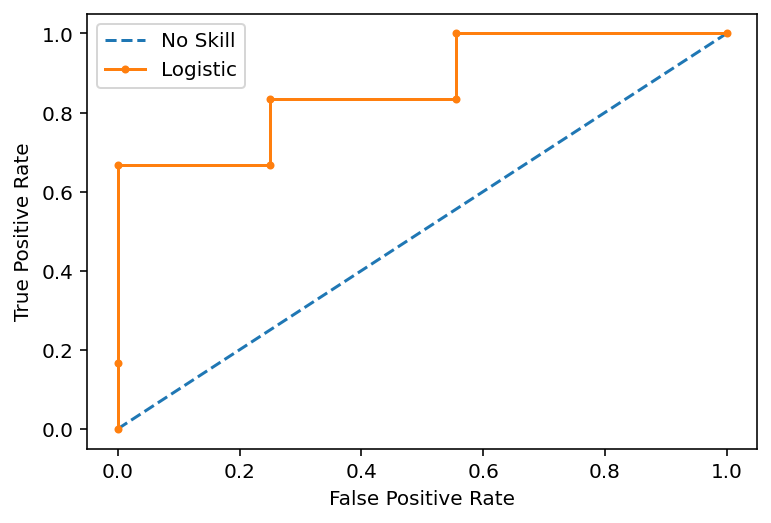

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


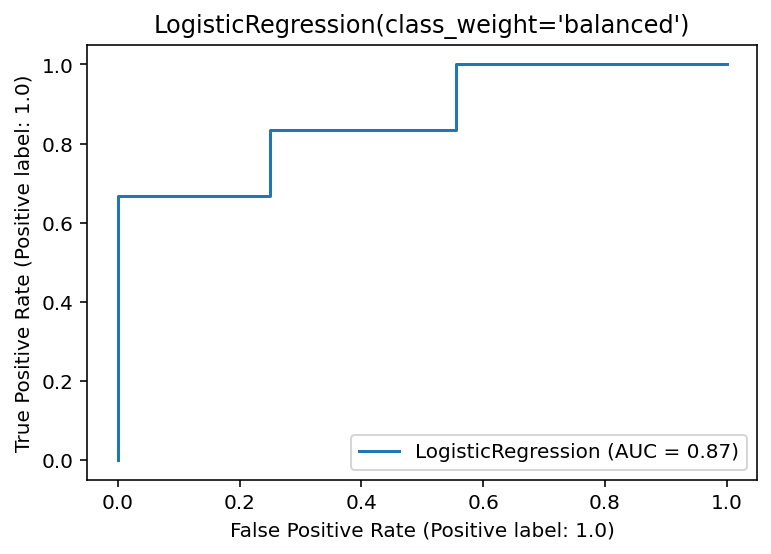

AUROC: 0.866
Best Threshold: 0.662057


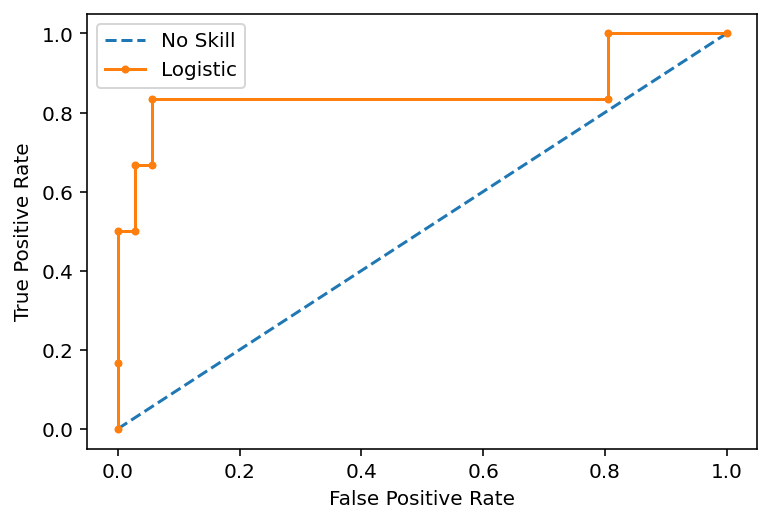

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


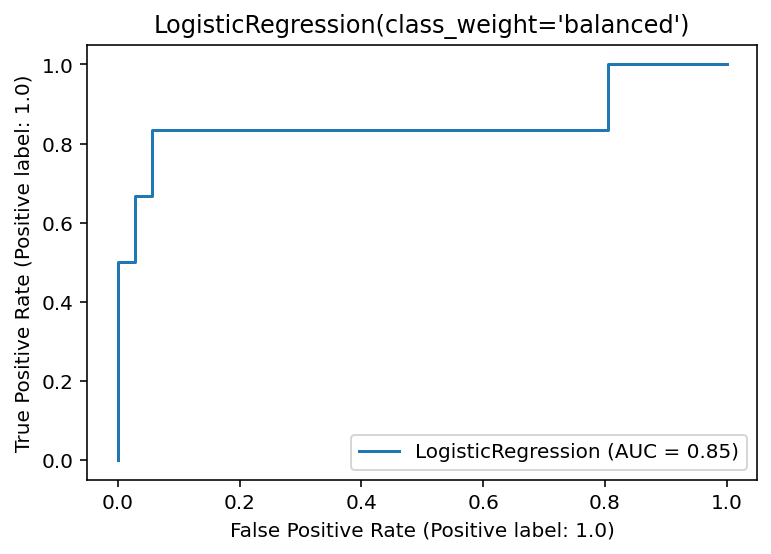

AUROC: 0.852
Best Threshold: 0.677555


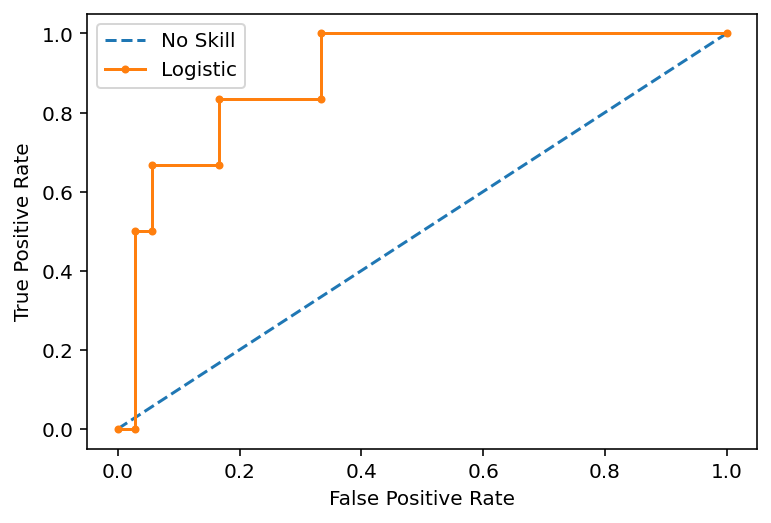

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


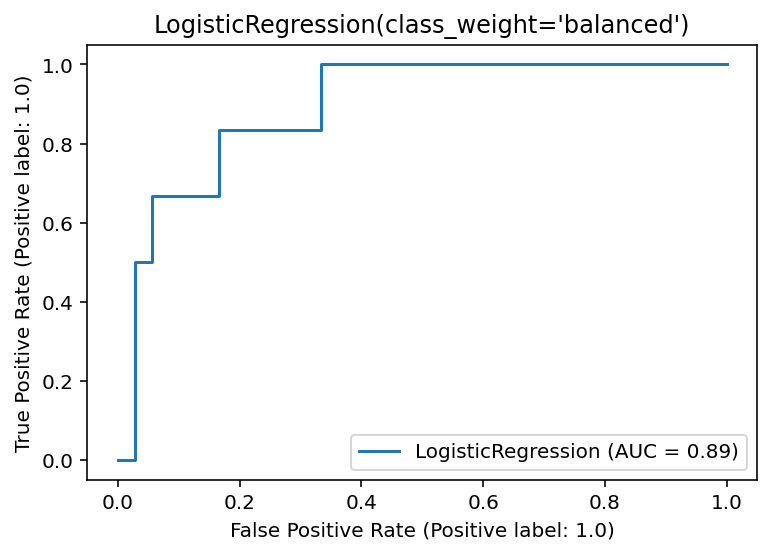

AUROC: 0.894
Best Threshold: 0.497894


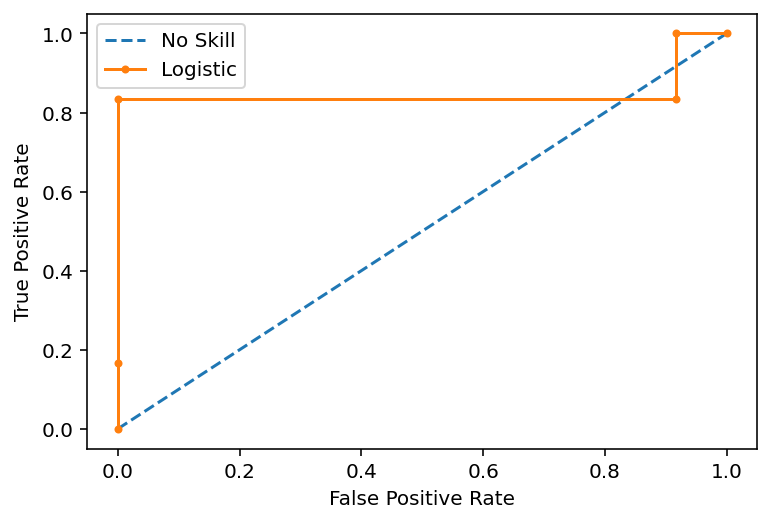

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


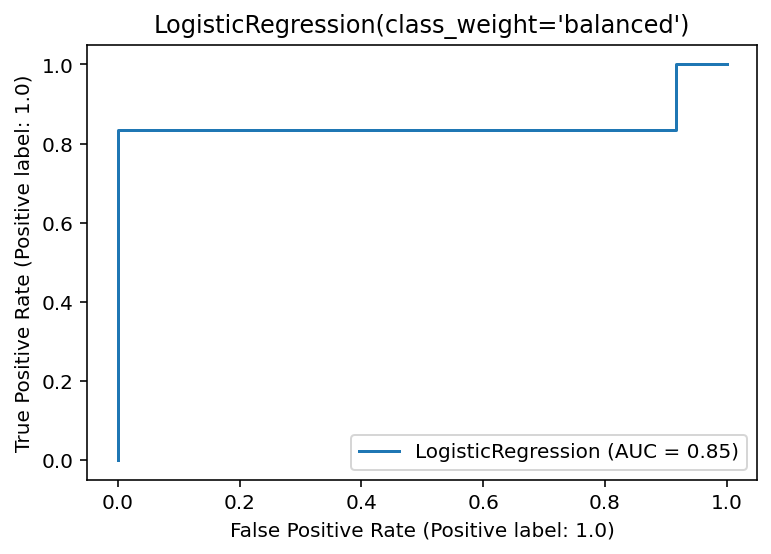

AUROC: 0.847
Best Threshold: 0.840327


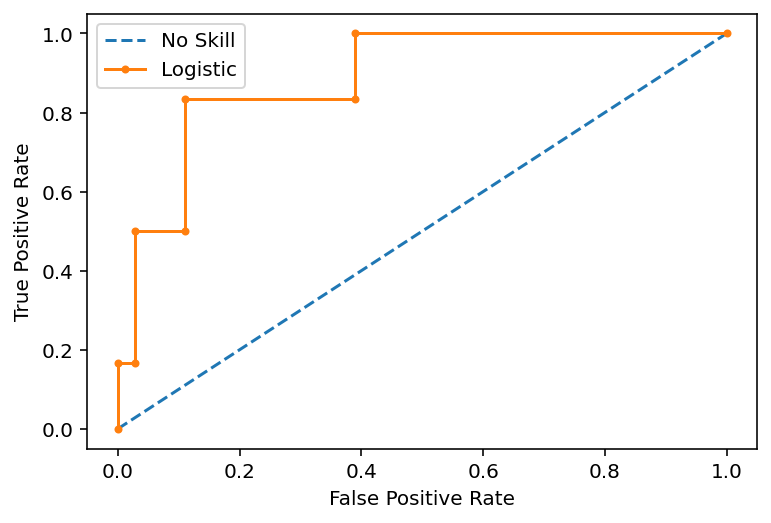

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


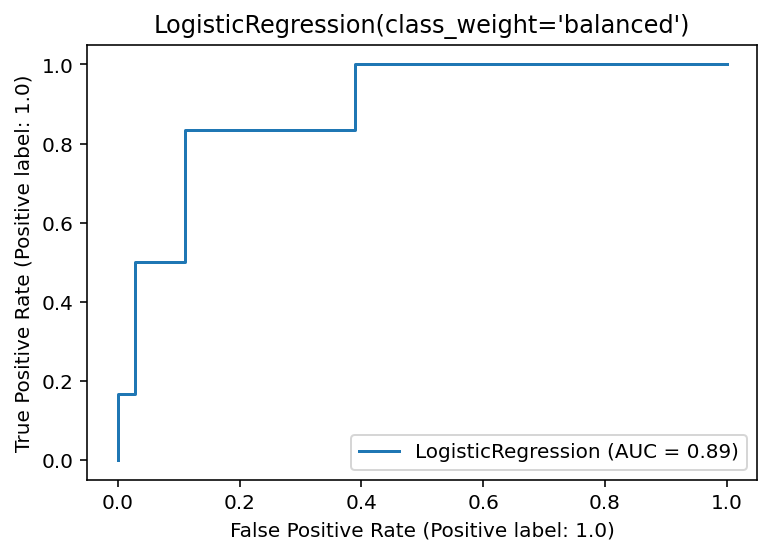

AUROC: 0.889
Best Threshold: 0.618128


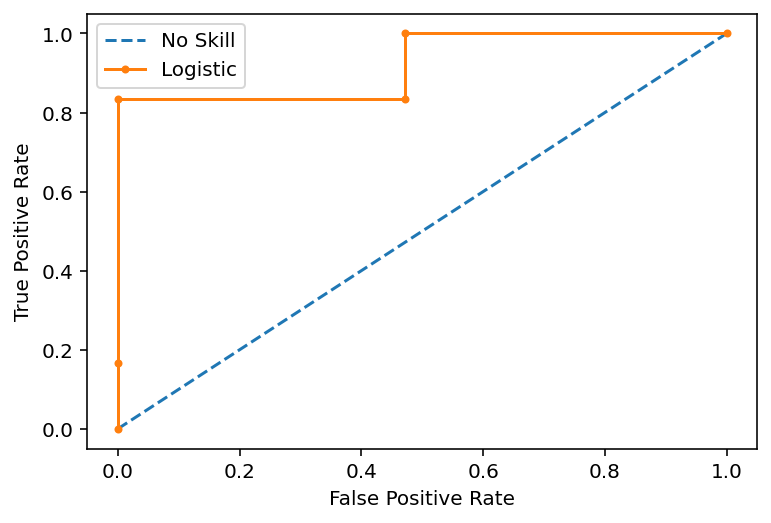

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


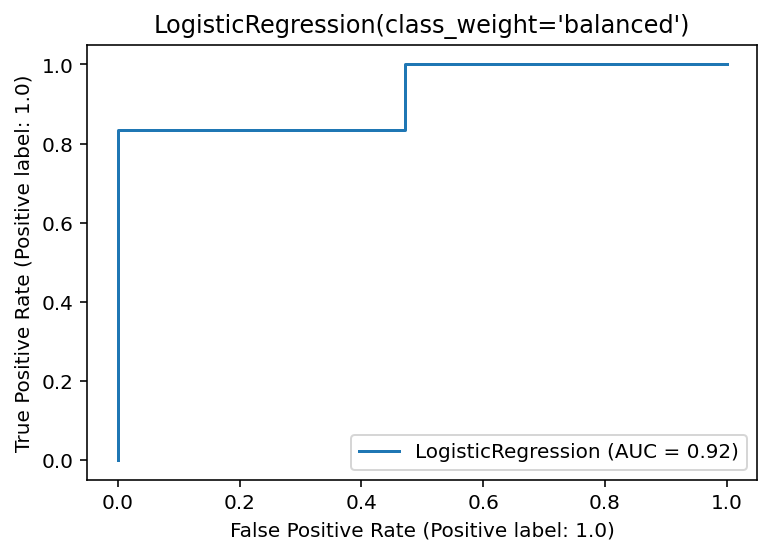

AUROC: 0.921
Best Threshold: 0.730786


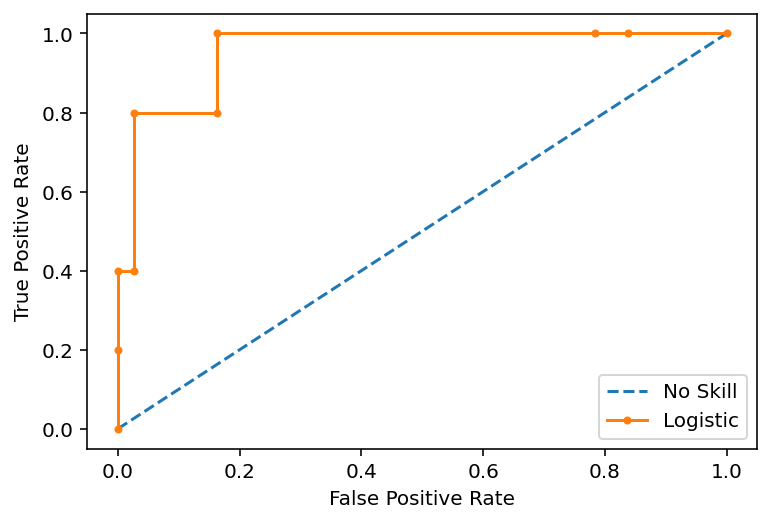

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


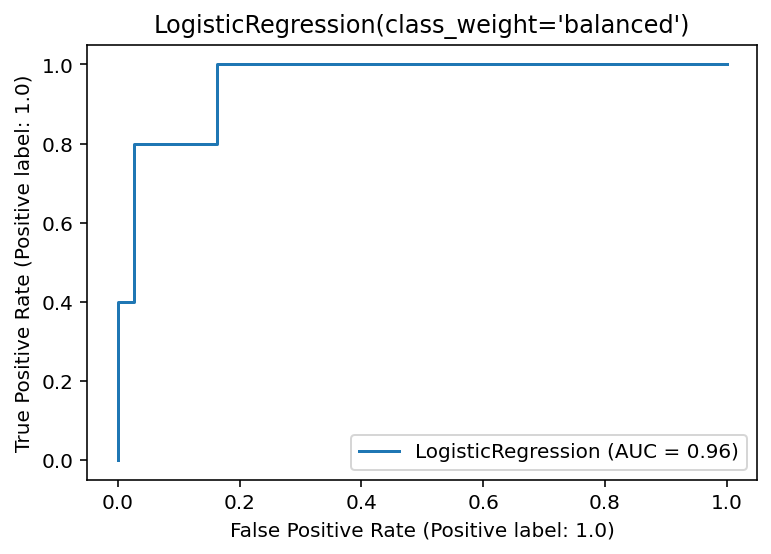

AUROC: 0.957
Best Threshold: 0.403631


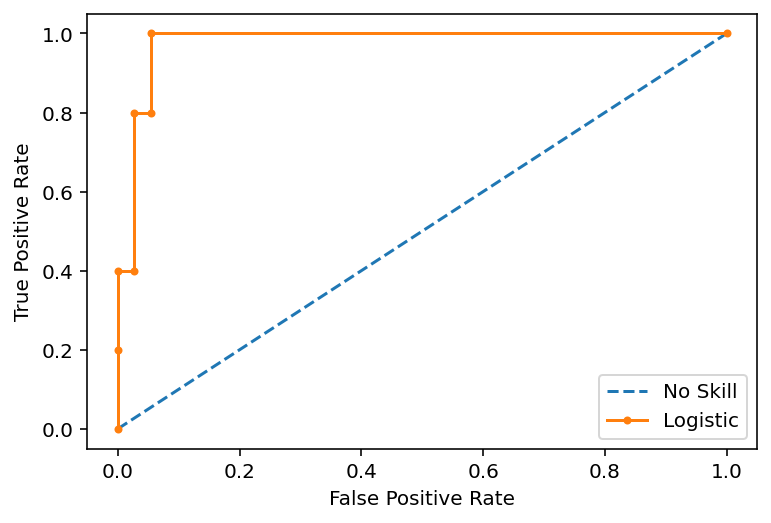

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


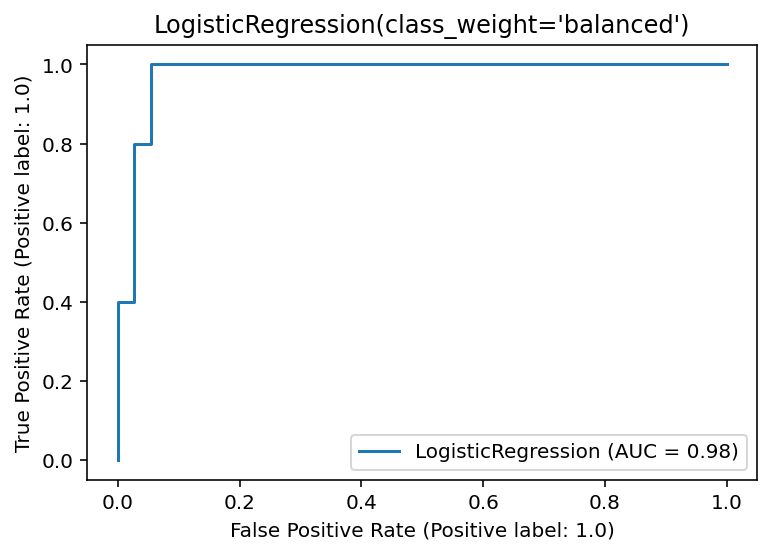

AUROC: 0.978
Best Threshold: 0.689623


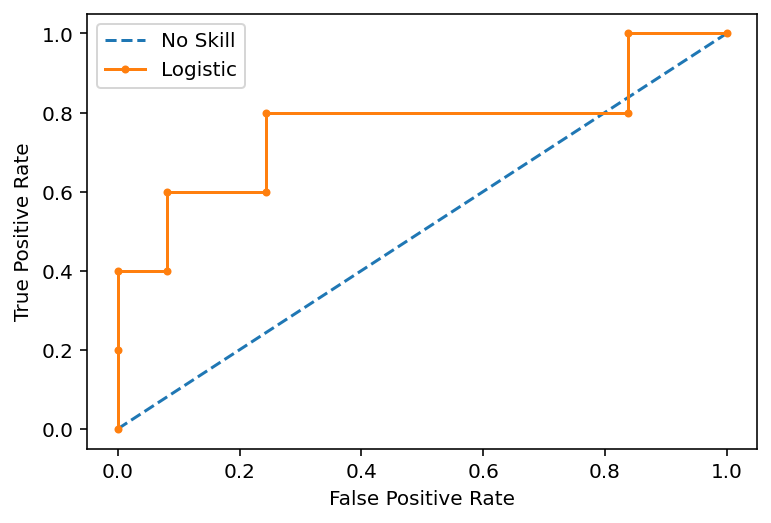

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


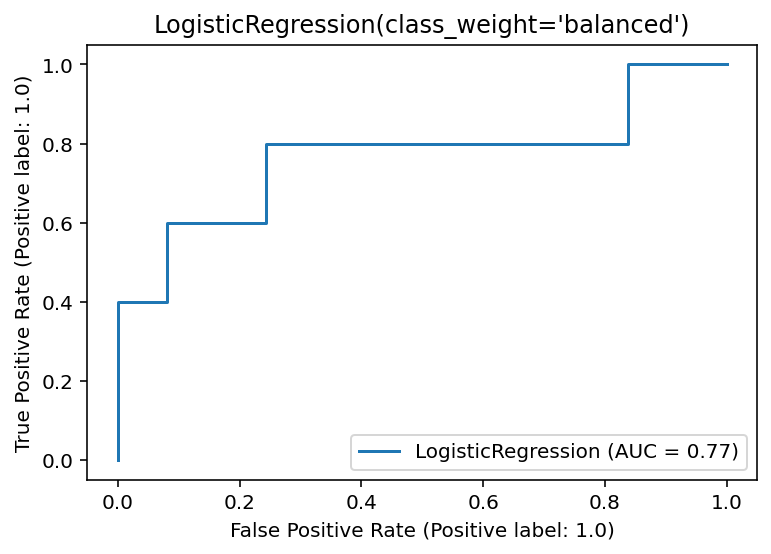

AUROC: 0.768
Best Threshold: 0.414563


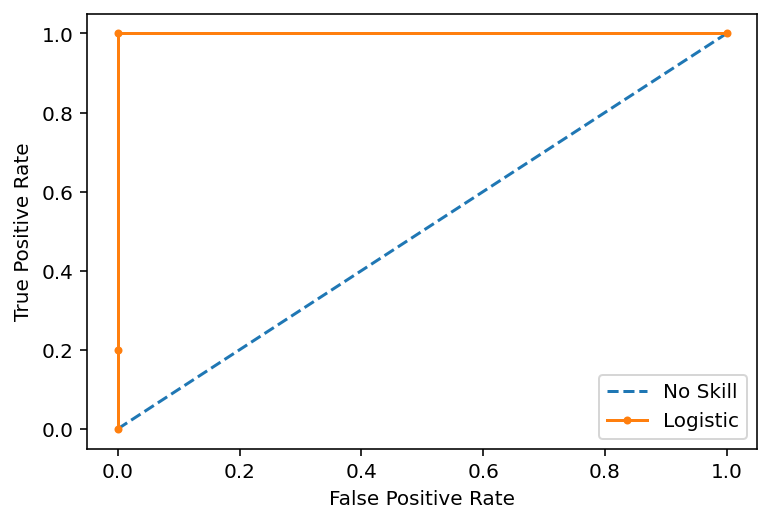

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


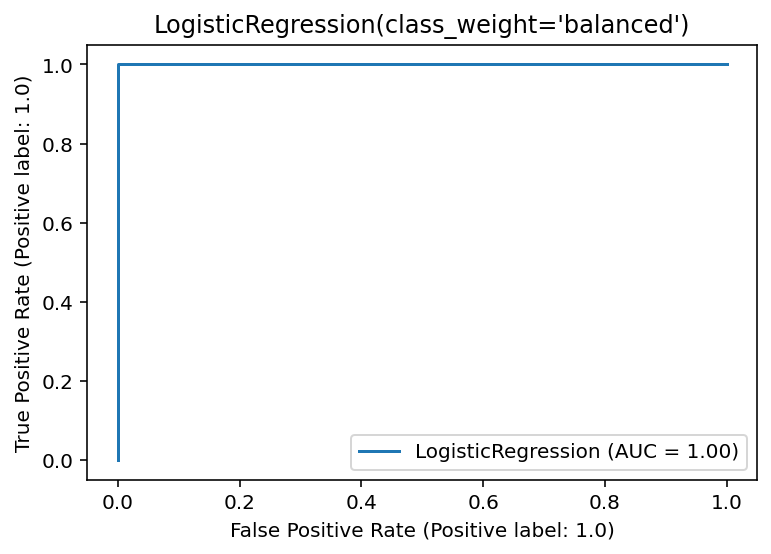

AUROC: 1.000
Best Threshold: 0.459348


0.14008618523416655

In [ ]:
#ROC Threshold Moving for Imbalanced Classification
best_thresh1=[]
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics
def threshold_imbalance(model):
  skf = StratifiedKFold(n_splits=10)
  for k,(j,i) in enumerate(skf.split(xdata_shuffled,ydata_shuffled)):
      train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
      model.fit(train, ytrain)
      pred = model.predict_proba(test)
      #y_pred = (model.predict_proba(test)[:,1] >= 0.6).astype(bool)
      yhat_positive = pred[:, 1]
      # plot no skill roc curve - the diagonal line
      #plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

      # calculate inputs for the roc curve
      fpr, tpr, thresholds = roc_curve(ytest, yhat_positive)

      # plot roc curve
      #plt.plot(fpr, tpr, marker='.', label='Logistic')
      # axis labels
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      # show the legend
      plt.legend()
      plt.show()
      metrics.plot_roc_curve(LR, test, ytest)
      plt.title(LR)
      plt.show()
      roc_auc=roc_auc_score(ytest, yhat_positive)
      print('AUROC: %.3f' % roc_auc)
      #import the required library
      from numpy import argmax

  # get the best threshold
      J = tpr - fpr
      ix = argmax(J)
      best_thresh = thresholds[ix]
      print('Best Threshold: %f' % (best_thresh))
      best_thresh1.append(best_thresh)
  bt=np.mean(best_thresh1)




In [ ]:
np.mean(best_thresh1)
np.std(best_thresh1)

0.14008618523416655

In [ ]:
##probability metrics
#brier loss
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
these_TSS_for_this_k = []
lraccs=[]
recs=[]
precs=[]
recs=[]
TSS_k1_mean=[]
TSS_k1_std=[]

##with isotonic calibration
#calib_isotonic=CalibratedClassifierCV(model, cv=2, method="isotonic")

#with sigmoid calibration      
#calib_sigmoid=CalibratedClassifierCV(model, cv=2, method="sigmoid")
def model_name(model,bt,method):
  br_score_iso_m=[]
  br_score_sig_m=[]
  br_score_m=[]
  pred_m=[]
  pred_iso_m=[]
  pred_sig_m=[]
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score

  skf = StratifiedKFold(n_splits=5)
  for k,(j,i) in enumerate(skf.split(xdata_shuffled,ydata_shuffled)):
      train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
      if method==0:
        model.fit(train, ytrain)
        if bt==0:
          pred = model.predict_proba(test)[:,1]
        else:
          pred = (model.predict_proba(test)[:,1] >= bt).astype(bool)
        print("Brier score losses: (the smaller the better)")
        pred_m.append(pred)
        br_score = brier_score_loss(ytest, pred)
        br_score_m.append(br_score)
        
      if method=='isotonic':
        calib_isotonic=CalibratedClassifierCV(model, cv=2, method="isotonic")
        calib_isotonic.fit(train, ytrain)
        pred_iso = calib_isotonic.predict_proba(test)[:,1]
        br_score_iso = brier_score_loss(ytest, pred_iso)
        pred_iso_m.append(pred_iso)
        br_score_iso_m.append(br_score_iso)
      if method=='sigmoid':
        calib_sigmoid=CalibratedClassifierCV(model, cv=2, method="sigmoid")
        calib_sigmoid.fit(train, ytrain)
        pred_sig = calib_sigmoid.predict_proba(test)[:,1]
        br_score_sig = brier_score_loss(ytest, pred_sig)
        pred_sig_m.append(pred_sig)
        br_score_sig_m.append(br_score_sig)
  return br_score_sig_m,br_score_iso_m,br_score_m,pred_m,pred_iso_m,pred_sig_m
  print("sigmoid_calibration",np.mean(br_score_sig_m))
  print("isotonic_calibration",np.mean(br_score_iso_m))
  print("no_calibration",np.mean(br_score_m))
      

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

def model_prob(model):
  these_TSS_for_this_k = []
  lraccs=[]
  recs=[]
  precs=[]
  recs=[]
  TSS_k1_mean=[]
  TSS_k1_std=[]
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import precision_score
  from sklearn.metrics import recall_score

  skf = StratifiedKFold(n_splits=10)
  for k,(j,i) in enumerate(skf.split(xdata_shuffled,ydata_shuffled)):
      train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
      ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
      calib_isotonic=CalibratedClassifierCV(model, cv=2, method="isotonic")
      calib_isotonic.fit(train, ytrain)
      pred = calib_isotonic.predict(test)
      TN,FP,TP,FN = confusion_table(pred, ydata_shuffled[i])
      if (((TP+FN) == 0.0) or (FP+TN)==0.0):
          these_TSS_for_this_k.append(-1.0)
          continue
      else:
          these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
      lracc = accuracy_score(ytest, pred)
      prec = precision_score(ytest, pred)
      rec = recall_score(ytest, pred)
      lraccs.append(lracc)
      precs.append(prec)
      recs.append(rec)
  TSS_k = np.array(these_TSS_for_this_k)

  array_of_avg_TSS=np.mean(TSS_k)
  array_of_std_TSS=np.std(TSS_k)
  TSS_k1_mean.append(array_of_avg_TSS)
  TSS_k1_std.append(array_of_std_TSS)
  print("The TSS equals",array_of_avg_TSS,'+/-',array_of_std_TSS)
  lraccuracy = np.mean(lraccs)
  print(np.mean(lraccs),'+/-',np.std(lraccs))
  print(np.mean(precs),'+/-',np.std(precs))
  print(np.mean(recs),'+/-',np.std(recs))
  plot_confusion_matrix(pred, ytest)
  print("1-with CME,0-without CME")
  from sklearn import metrics
  metrics.plot_roc_curve(model, test, ytest)
  plt.title(model)
  plt.show() 
      

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The TSS equals 0.45666666666666667 +/- 0.24812631191928572
0.9285714285714286 +/- 0.030116930096841694
0.9 +/- 0.30000000000000004
0.45666666666666667 +/- 0.24812631191928572
Confusion matrix, without normalization


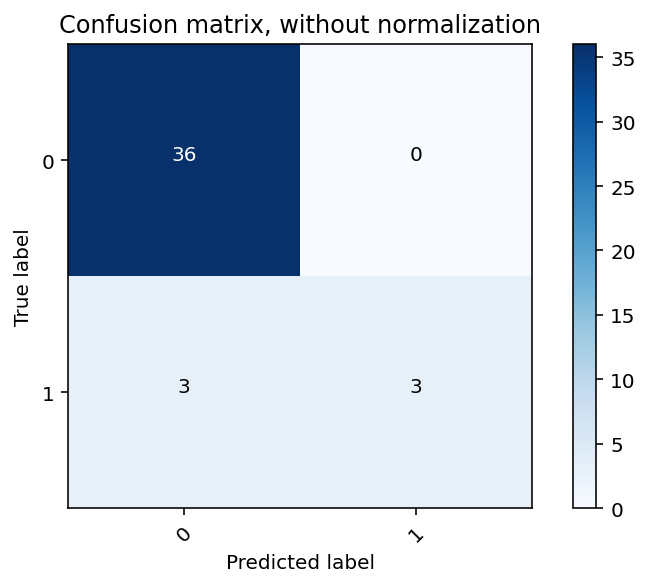

Normalized confusion matrix


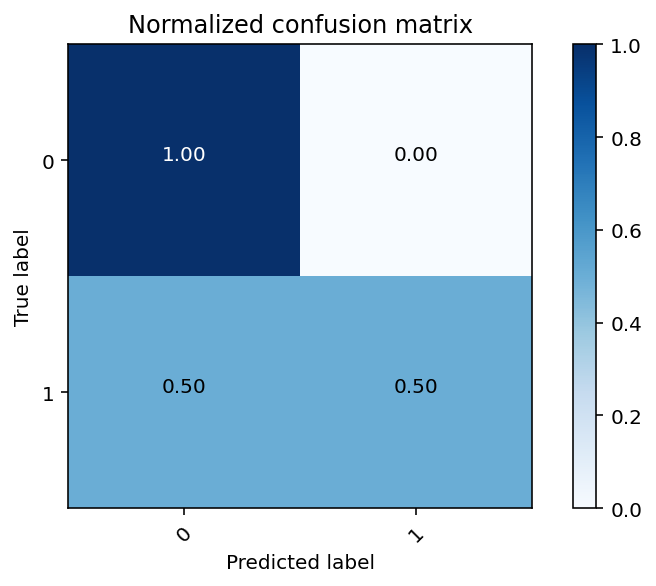

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


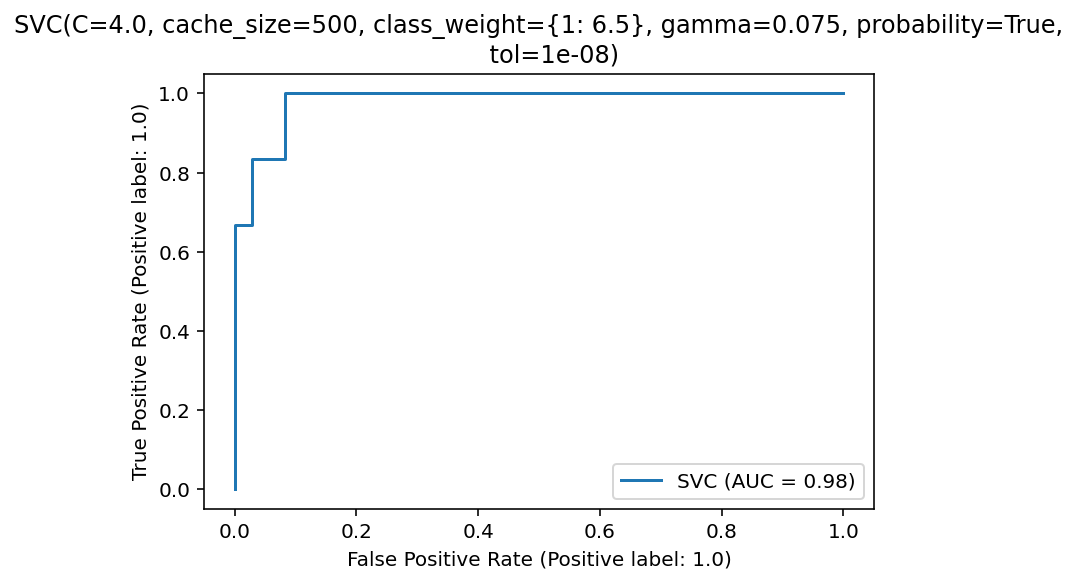

In [ ]:
method=[svm,XGboost,RF,DT,LR,Bayes,Adaboost,KNN,LDA,GB]
model_prob(svm)

In [ ]:
br_score_sig_m,_,_,_,_,pred_sig_m=model_name(LDA,0,'sigmoid')
_,br_score_iso_m,_,_,pred_iso_m,_=model_name(LDA,0,'isotonic')
_,_,br_score_m,pred_m,_,_=model_name(LDA,0,0)
plt.figure()
order = np.lexsort((pred,))
plt.plot(pred[order], "r", label="No calibration (%1.3f)" % br_score_m)
plt.plot(
    pred_iso[order],
    "g",
    linewidth=3,
    label="Isotonic calibration (%1.3f)" % br_score_iso_m,
)
plt.plot(
    pred_sig[order],
    "b",
    linewidth=3,
    label="Sigmoid calibration (%1.3f)" % br_score_sig_m,
)
#plt.plot(
 #   np.linspace(0, ytest.size, 1)[1::2],
  #  ytest[order].reshape(25, -1).mean(1),
   # "k",
    #linewidth=3,
    #label=r"Empirical",
#)
plt.ylim([-0.05, 1.05])
plt.xlabel("Instances sorted according to predicted probability (uncalibrated GNB)")
plt.ylabel("P(y=1)")
plt.legend(loc="upper left")
plt.title("Gaussian naive Bayes probabilities")

plt.show()

Brier score losses: (the smaller the better)
Brier score losses: (the smaller the better)
Brier score losses: (the smaller the better)
Brier score losses: (the smaller the better)
Brier score losses: (the smaller the better)


TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:

model_name(GB,0,'sigmoid')

sigmoid_calibration 0.0860470083707963
isotonic_calibration nan
no_calibration nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
TN,FP,TP,FN = confusion_table(pred, ydata_shuffled[i])
      if (((TP+FN) == 0.0) or (FP+TN)==0.0):
          these_TSS_for_this_k.append(-1.0)
          continue
      else:
          these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
      lracc = accuracy_score(ytest, pred)
      prec = precision_score(ytest, pred)
      rec = recall_score(ytest, pred)
      lraccs.append(lracc)
      precs.append(prec)
      recs.append(rec)
  TSS_k = np.array(these_TSS_for_this_k)

  array_of_avg_TSS=np.mean(TSS_k)
  array_of_std_TSS=np.std(TSS_k)
  TSS_k1_mean.append(array_of_avg_TSS)
  TSS_k1_std.append(array_of_std_TSS)
  print("The TSS equals",array_of_avg_TSS,'+/-',array_of_std_TSS)
  lraccuracy = np.mean(lraccs)
  print(np.mean(lraccs),'+/-',np.std(lraccs))
  print(np.mean(precs),'+/-',np.std(precs))
  print(np.mean(recs),'+/-',np.std(recs))
  plot_confusion_matrix(pred, ytest)
  print("1-with CME,0-without CME")
  from sklearn import metrics
  metrics.plot_roc_curve(model, test, ytest)
  plt.title(model)
  plt.show()

In [ ]:
gnb_sigmoid = CalibratedClassifierCV(gnb, cv=2, method="sigmoid")

array([4.59e-01, 4.02e-01, 2.96e-01, 4.49e-02, 2.24e-01, 1.48e-01,
       2.19e-01, 3.93e-01, 2.09e-01, 6.60e-01, 9.08e-02, 3.68e-02,
       2.61e-01, 8.27e-01, 1.15e-01, 2.86e-01, 9.75e-03, 8.59e-02,
       4.76e-03, 1.99e-01, 4.41e-01, 2.81e-01, 1.99e-01, 2.56e-01,
       3.86e-01, 7.07e-02, 2.35e-01, 3.22e-03, 8.44e-01, 2.59e-02,
       1.77e-02, 9.34e-05, 2.99e-02, 4.43e-02, 6.66e-02, 7.86e-02,
       4.32e-01, 4.11e-01, 8.13e-01, 1.42e-01, 1.70e-01, 3.78e-01])

33.0 3.0 2.0 4.0
36.0 0.0 5.0 1.0
36.0 0.0 5.0 1.0
35.0 1.0 5.0 1.0
35.0 1.0 2.0 4.0
36.0 0.0 6.0 0.0
37.0 0.0 3.0 2.0
36.0 1.0 3.0 2.0
36.0 1.0 4.0 1.0
36.0 1.0 4.0 1.0
The TSS equals 0.6746696696696697 +/- 0.22916231571425552
0.9404761904761905 +/- 0.046717659215115656
0.825 +/- 0.18306798979856878
0.6966666666666667 +/- 0.2126290457842275
Confusion matrix, without normalization


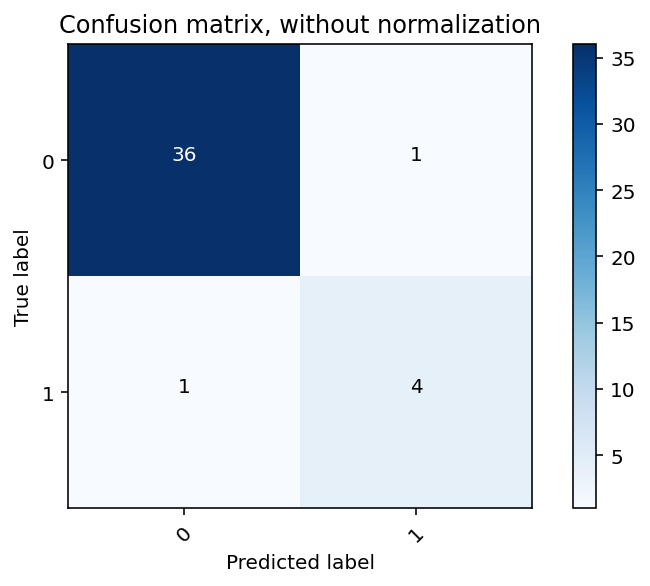

Normalized confusion matrix


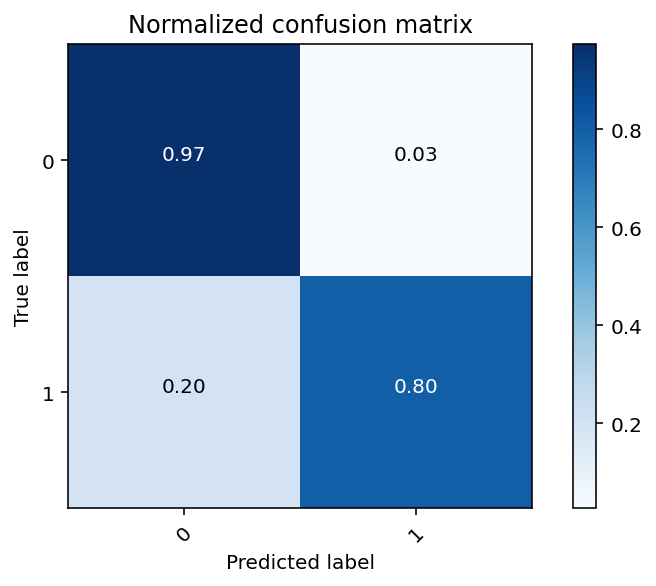

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


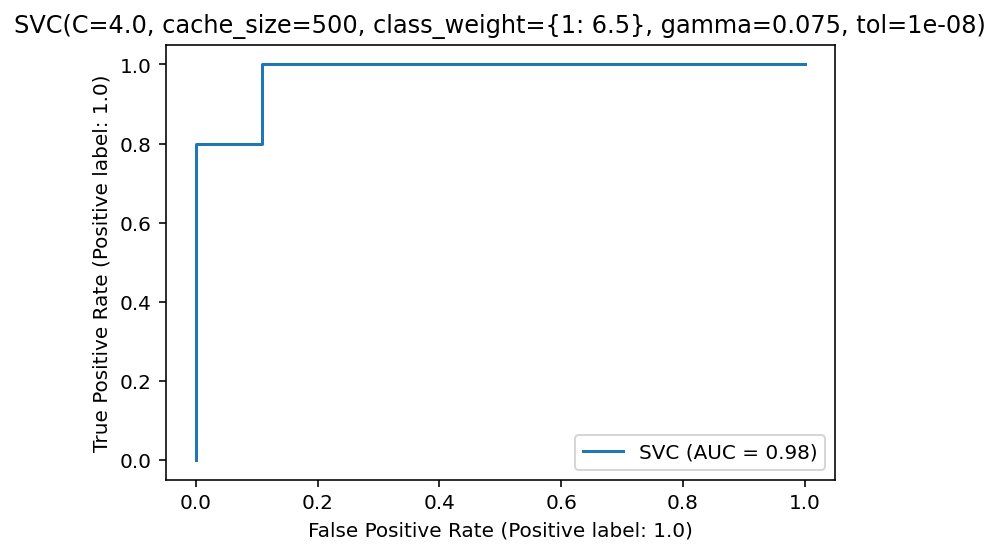

36.0 0.0 0.0 6.0
36.0 0.0 4.0 2.0
36.0 0.0 0.0 6.0
36.0 0.0 1.0 5.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


35.0 1.0 1.0 5.0
36.0 0.0 3.0 3.0
37.0 0.0 1.0 4.0
35.0 2.0 0.0 5.0
37.0 0.0 3.0 2.0
37.0 0.0 2.0 3.0
The TSS equals 0.46824324324324323 +/- 0.3159386642005598
0.9178571428571427 +/- 0.04964442729045962
0.7375 +/- 0.35449004844204646
0.4833333333333333 +/- 0.31171568242016096
Confusion matrix, without normalization


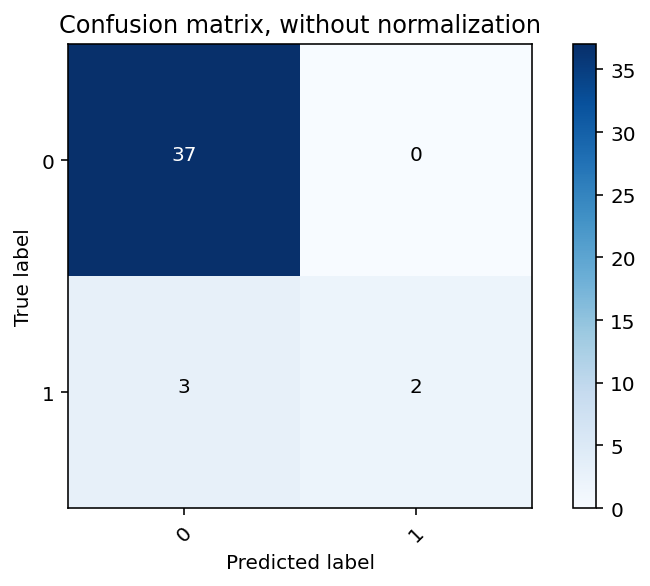

Normalized confusion matrix


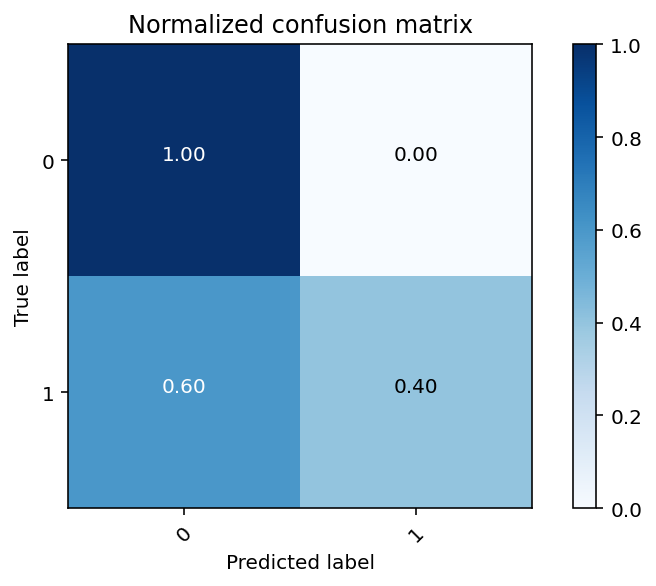

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


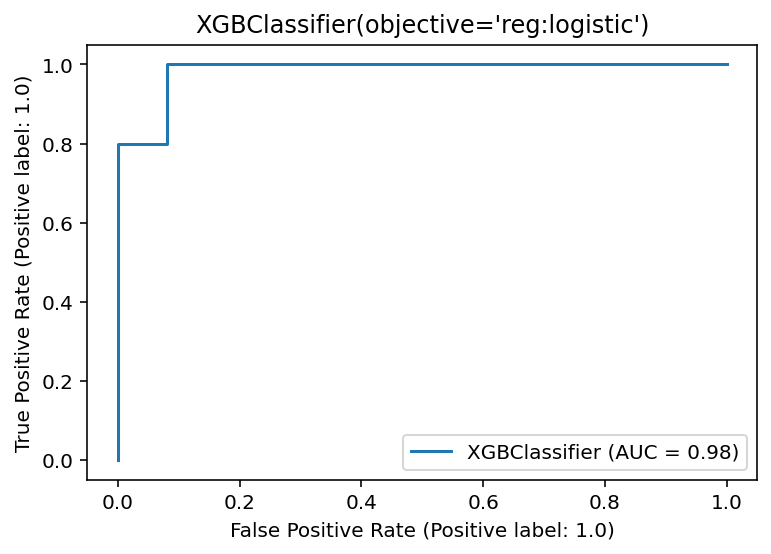

32.0 4.0 1.0 5.0
34.0 2.0 3.0 3.0
34.0 2.0 2.0 4.0
33.0 3.0 2.0 4.0
35.0 1.0 0.0 6.0
32.0 4.0 3.0 3.0
37.0 0.0 2.0 3.0
37.0 0.0 1.0 4.0
36.0 1.0 4.0 1.0
33.0 4.0 3.0 2.0
The TSS equals 0.4206206206206206 +/- 0.29470081403181136
0.9007936507936507 +/- 0.05466980983903022
0.6702380952380953 +/- 0.3527115298376611
0.45 +/- 0.2881293433833467
Confusion matrix, without normalization


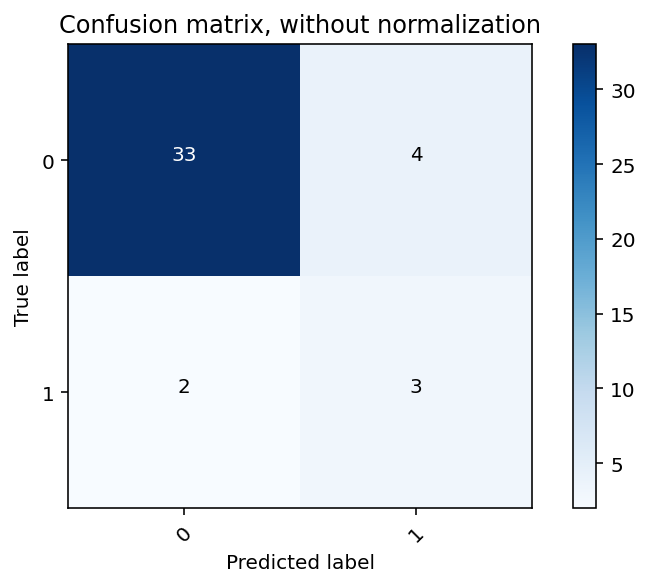

Normalized confusion matrix


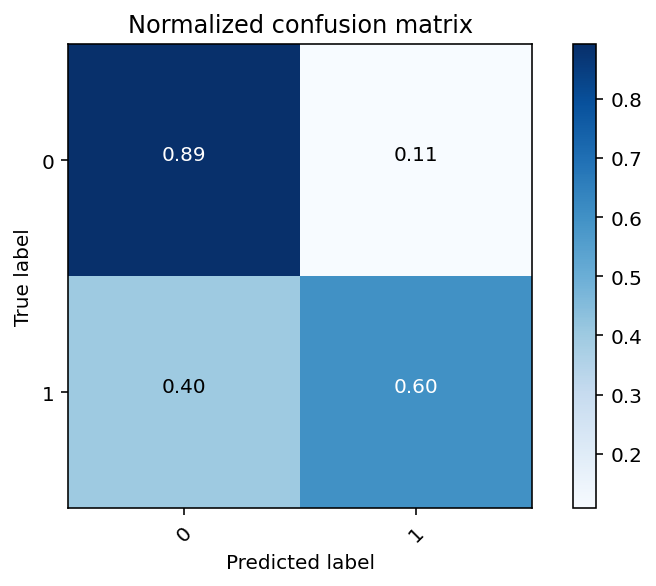

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


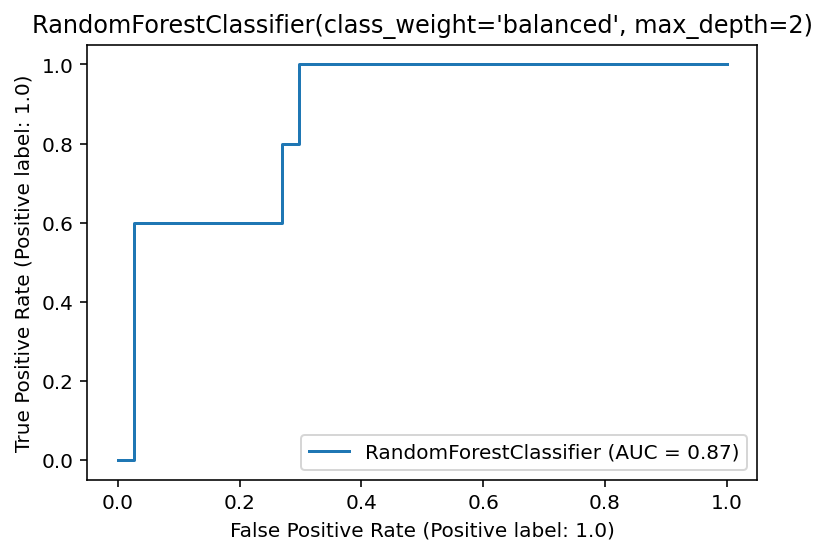

33.0 3.0 3.0 3.0
31.0 5.0 5.0 1.0
33.0 3.0 3.0 3.0
33.0 3.0 2.0 4.0
34.0 2.0 4.0 2.0
34.0 2.0 2.0 4.0
36.0 1.0 2.0 3.0
35.0 2.0 1.0 4.0
36.0 1.0 3.0 2.0
36.0 1.0 2.0 3.0
The TSS equals 0.4187537537537537 +/- 0.2678305692867696
0.8946428571428573 +/- 0.050756046968365005
0.6397619047619048 +/- 0.31638064419009676
0.45666666666666667 +/- 0.2648060086595888
Confusion matrix, without normalization


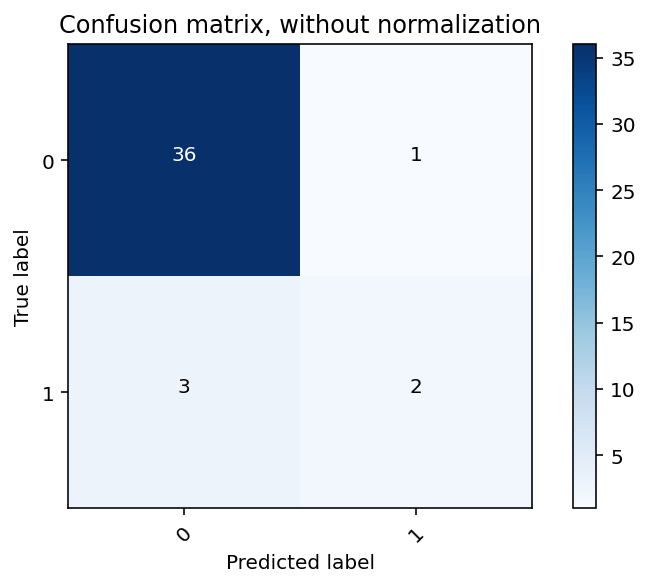

Normalized confusion matrix


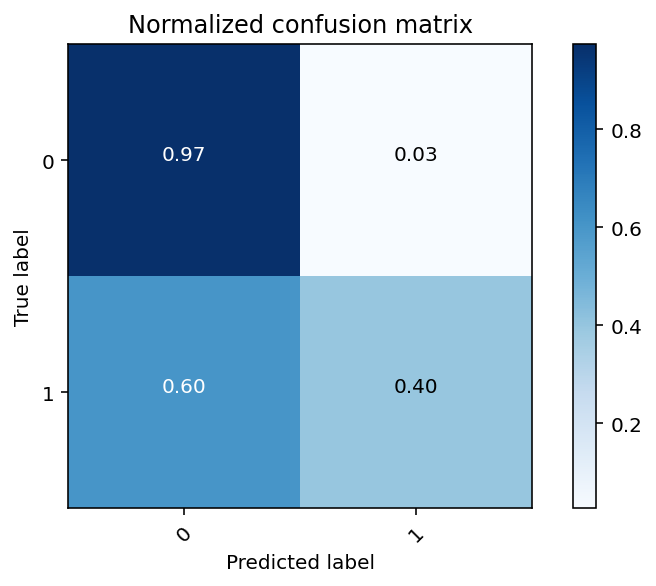

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


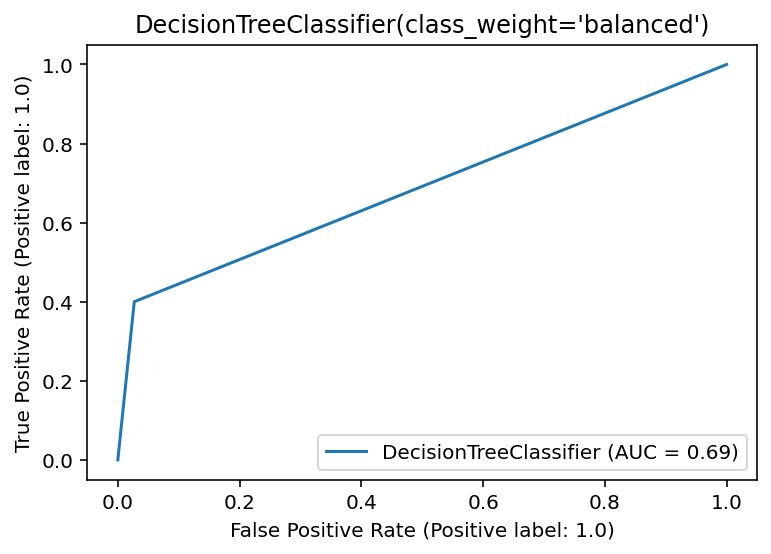

34.0 2.0 4.0 2.0
32.0 4.0 5.0 1.0
30.0 6.0 4.0 2.0
29.0 7.0 5.0 1.0
31.0 5.0 5.0 1.0
34.0 2.0 5.0 1.0
34.0 3.0 4.0 1.0
29.0 8.0 5.0 0.0
30.0 7.0 3.0 2.0
37.0 0.0 4.0 1.0
The TSS equals 0.46816216216216217 +/- 0.26476726964722397
0.889047619047619 +/- 0.05379266486846319
0.621993894993895 +/- 0.2981013659965217
0.5226666666666667 +/- 0.275474540061731
Confusion matrix, without normalization


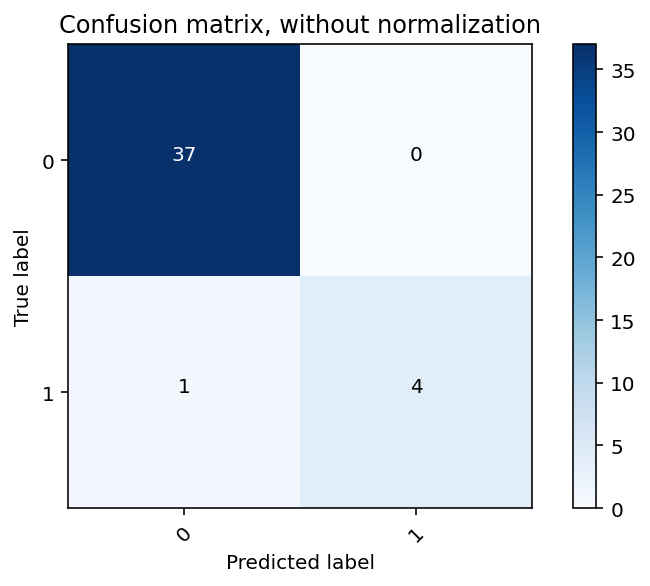

Normalized confusion matrix


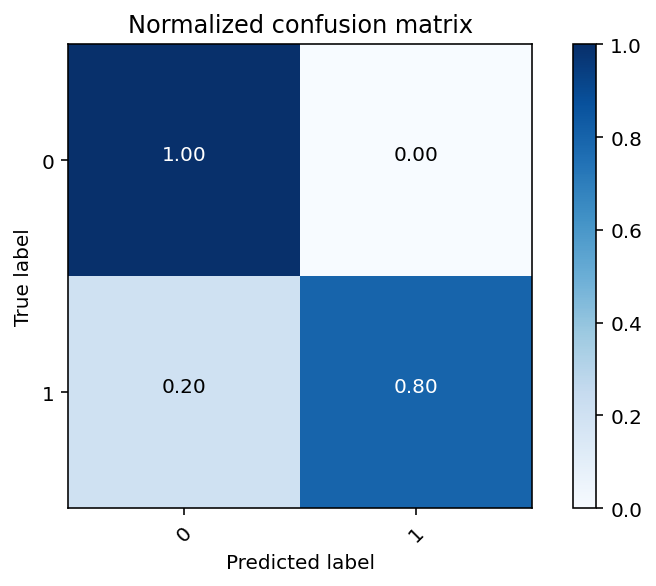

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


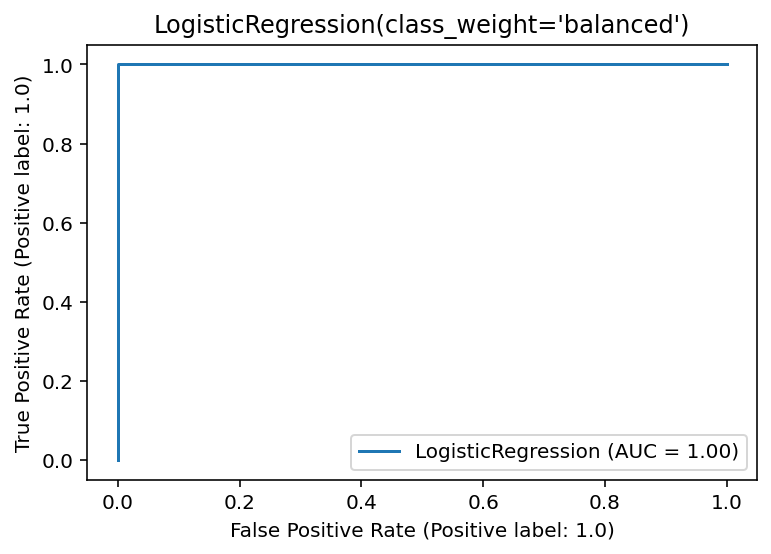

34.0 2.0 0.0 6.0
36.0 0.0 0.0 6.0
31.0 5.0 0.0 6.0
36.0 0.0 0.0 6.0
34.0 2.0 0.0 6.0
32.0 4.0 0.0 6.0
35.0 2.0 0.0 5.0
36.0 1.0 0.0 5.0
37.0 0.0 0.0 5.0
36.0 1.0 0.0 5.0
The TSS equals 0.3823148148148148 +/- 0.30919762297872105
0.8785714285714284 +/- 0.05729147340721888
0.5183282458282458 +/- 0.35747240605698616
0.43555555555555553 +/- 0.3180884262490232
Confusion matrix, without normalization


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


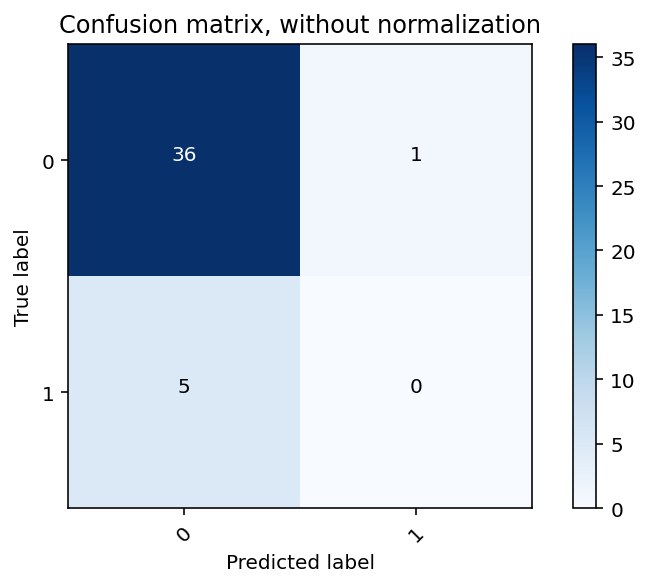

Normalized confusion matrix


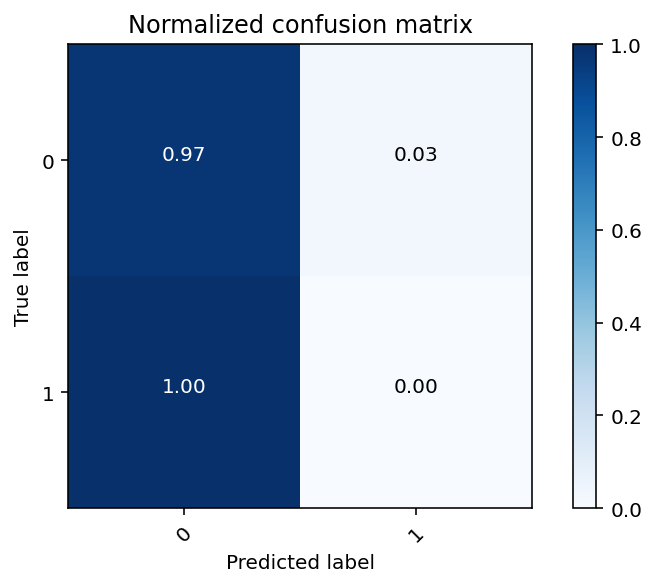

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


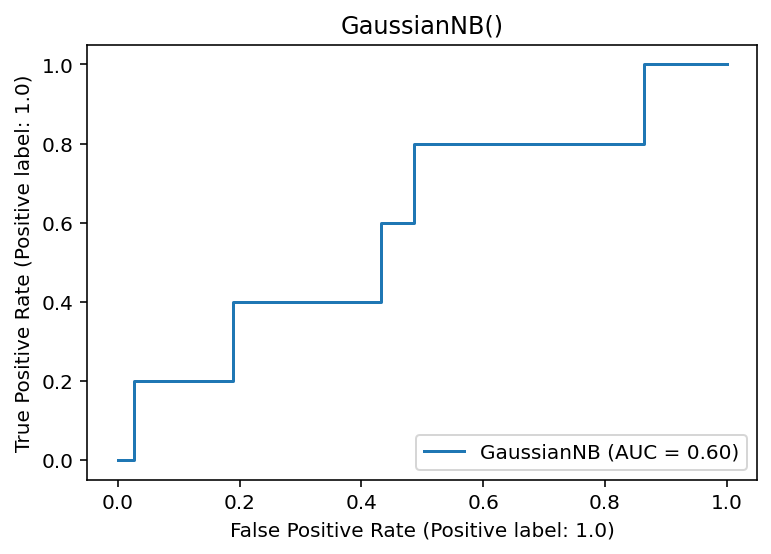

34.0 2.0 2.0 4.0
36.0 0.0 5.0 1.0
35.0 1.0 1.0 5.0
36.0 0.0 3.0 3.0
36.0 0.0 2.0 4.0
35.0 1.0 3.0 3.0
37.0 0.0 3.0 2.0
37.0 0.0 0.0 5.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


35.0 2.0 3.0 2.0
36.0 1.0 3.0 2.0
The TSS equals 0.38876233376233377 +/- 0.2997115664373574
0.8829931972789115 +/- 0.055873494417363445
0.5457099249956393 +/- 0.3570932038042168
0.4371428571428572 +/- 0.30708785037152647
Confusion matrix, without normalization


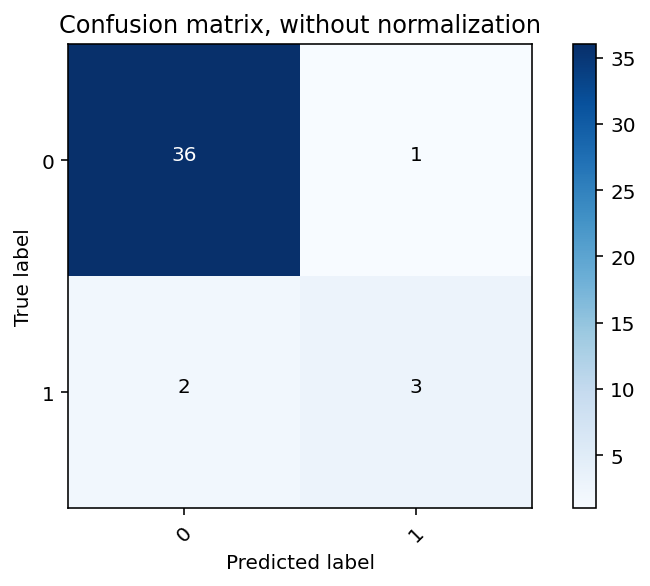

Normalized confusion matrix


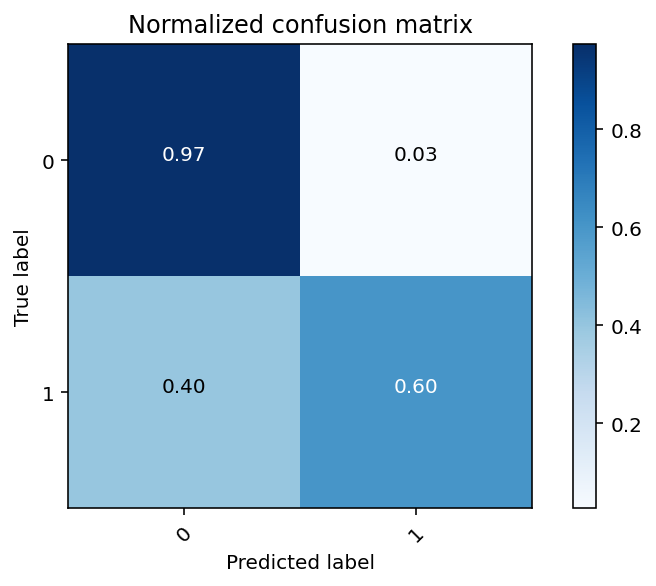

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


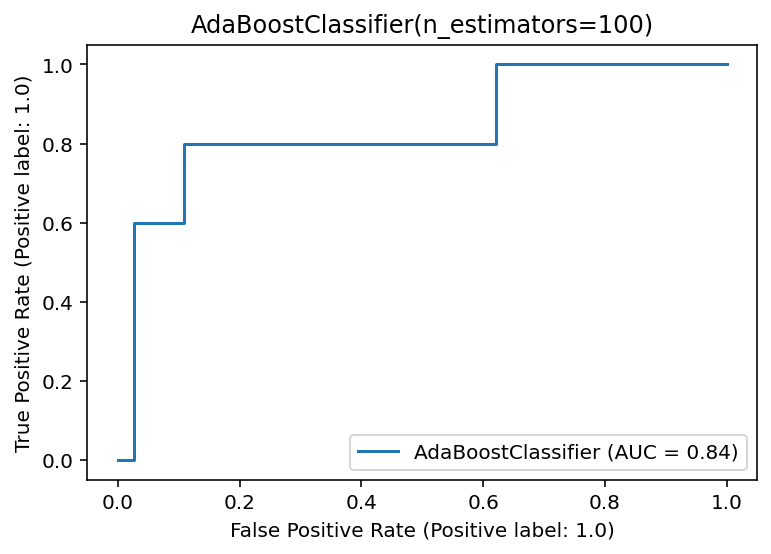

36.0 0.0 0.0 6.0
36.0 0.0 0.0 6.0
36.0 0.0 0.0 6.0
36.0 0.0 0.0 6.0
36.0 0.0 0.0 6.0
36.0 0.0 0.0 6.0
37.0 0.0 0.0 5.0
37.0 0.0 0.0 5.0
37.0 0.0 0.0 5.0
37.0 0.0 0.0 5.0
The TSS equals 0.34016704204204207 +/- 0.30843015711171057
0.8809523809523808 +/- 0.05270462766947299
0.47749618437118435 +/- 0.37966816109285206
0.3825 +/- 0.3215835384814065
Confusion matrix, without normalization


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined a

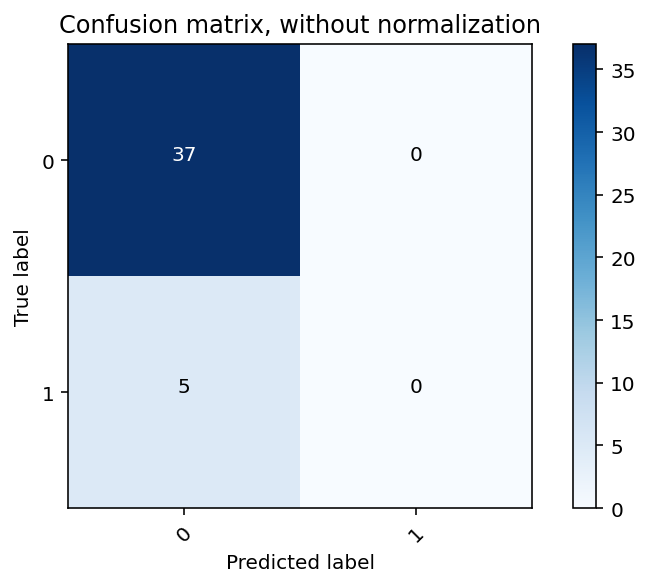

Normalized confusion matrix


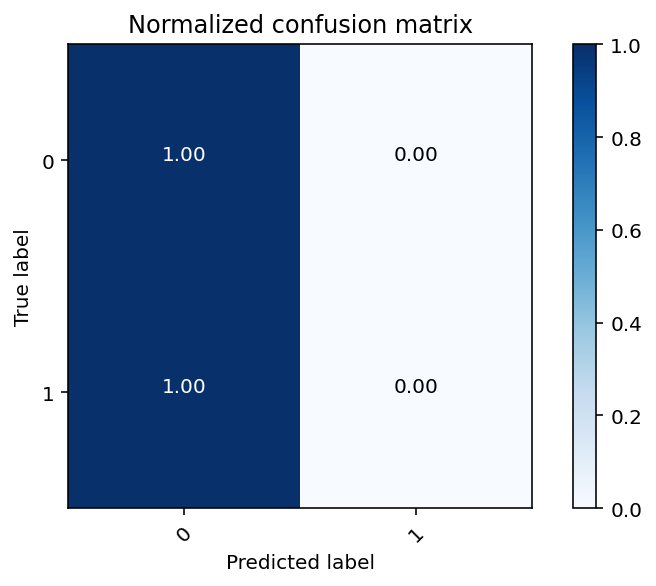

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


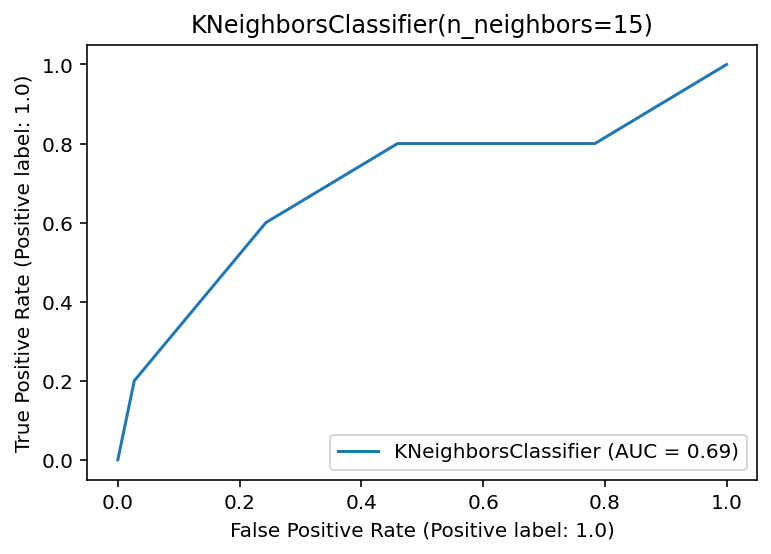

35.0 1.0 4.0 2.0
36.0 0.0 3.0 3.0
35.0 1.0 3.0 3.0
36.0 0.0 5.0 1.0
35.0 1.0 5.0 1.0
35.0 1.0 4.0 2.0
37.0 0.0 4.0 1.0
36.0 1.0 5.0 0.0
36.0 1.0 3.0 2.0
37.0 0.0 3.0 2.0
The TSS equals 0.37831331331331325 +/- 0.3143640153843997
0.8880952380952379 +/- 0.05423022319319527
0.5218484601817934 +/- 0.3808850365246202
0.41777777777777786 +/- 0.3233008765687521
Confusion matrix, without normalization


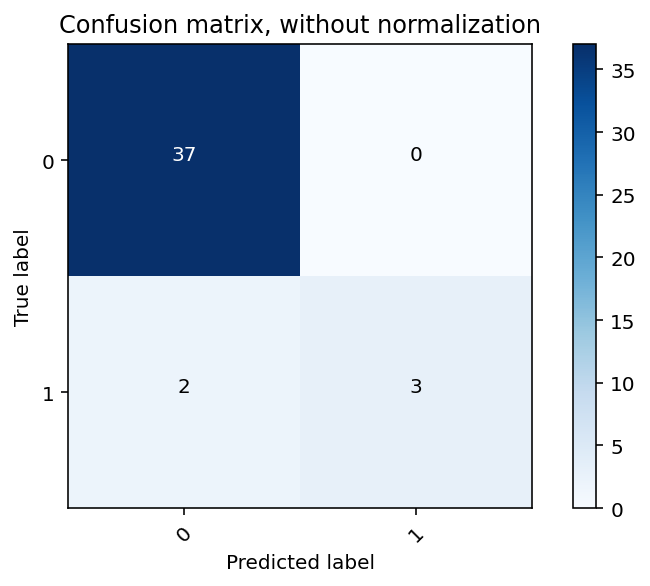

Normalized confusion matrix


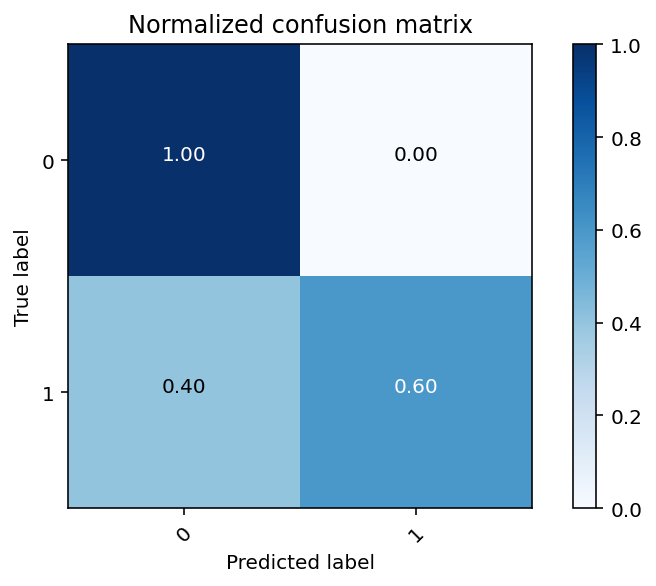

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


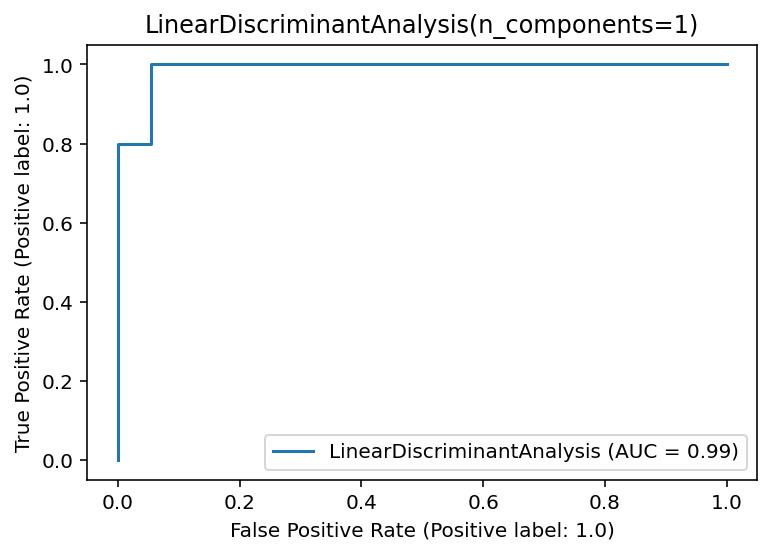

34.0 2.0 3.0 3.0
36.0 0.0 4.0 2.0
35.0 1.0 1.0 5.0
35.0 1.0 3.0 3.0
36.0 0.0 2.0 4.0
35.0 1.0 2.0 4.0
36.0 1.0 1.0 4.0
36.0 1.0 0.0 5.0
35.0 2.0 3.0 2.0
37.0 0.0 4.0 1.0
The TSS equals 0.37901201201201196 +/- 0.30769374183282866
0.8892857142857143 +/- 0.05285231638195979
0.5358302808302808 +/- 0.37525279264518474
0.41700000000000004 +/- 0.3156121036969273
Confusion matrix, without normalization


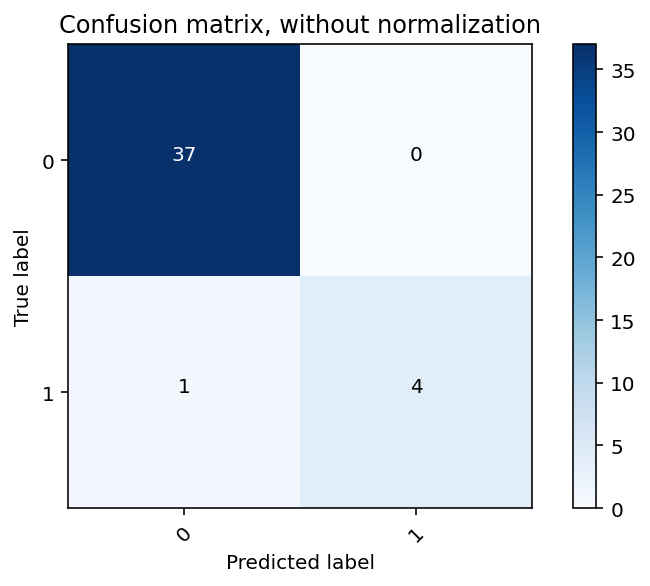

Normalized confusion matrix


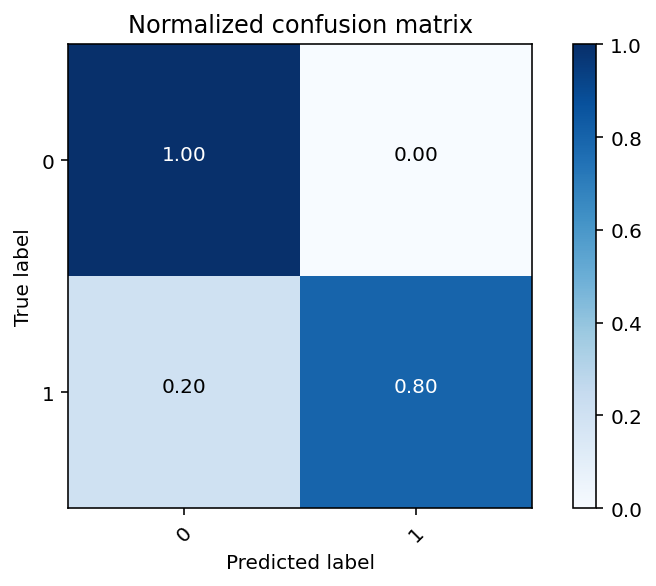

1-with CME,0-without CME


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


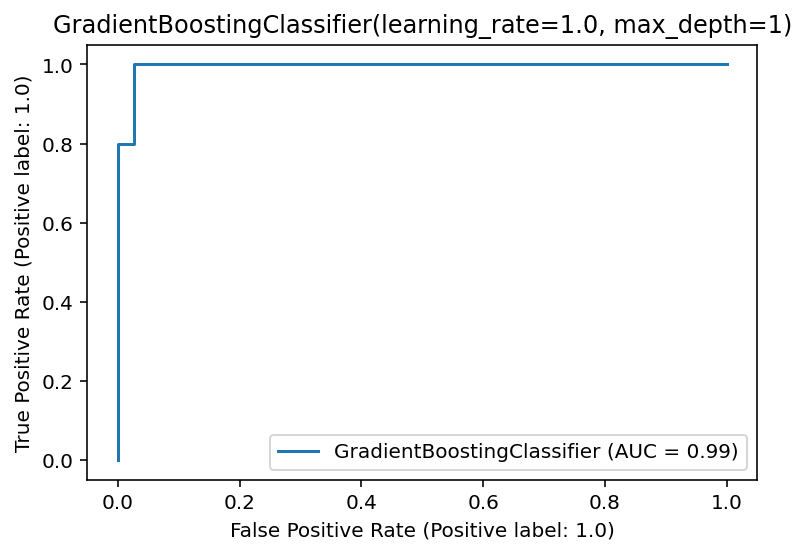

In [ ]:
for i in method:
  model_name(i)

In [ ]:
lraccs

NameError: ignored

In [ ]:
method

[SVC(C=4.0, cache_size=500, class_weight={1: 6.5}, gamma=0.075, tol=1e-08),
 XGBClassifier(objective='reg:logistic'),
 RandomForestClassifier(class_weight='balanced', max_depth=2, n_estimators=50),
 DecisionTreeClassifier(class_weight='balanced'),
 LogisticRegression(class_weight='balanced'),
 ElasticNet(random_state=0),
 GaussianNB(),
 AdaBoostClassifier(),
 KNeighborsClassifier(n_neighbors=15),
 BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier()),
 LinearDiscriminantAnalysis(n_components=2),
 GradientBoostingClassifier(learning_rate=1.0, max_depth=1, n_estimators=50)]

In [ ]:
from imblearn.over_sampling import SMOTE

counter = Counter(ydata_shuffled)
print('before',counter)
#oversampling the train dataset using SMOTE
smt = SMOTE()
xdata_shuffled, ydata_shuffled = smt.fit_resample(xdata_shuffled, ydata_shuffled)

counter = Counter(ydata_shuffled)
print('after',counter)

before Counter({0.0: 364, 1.0: 56})
after Counter({0.0: 364, 1.0: 364})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### SVM

In [ ]:
from sklearn import svm
C = 4.0; gamma = 0.075; class_weight = {1:6.5}
svm = svm.SVC(C=C, gamma=gamma, kernel='rbf',class_weight=class_weight, cache_size=500, max_iter=-1, shrinking=True, tol=1e-8)

In [ ]:
pred_trials=[]
pred_orig=[]
skf = StratifiedKFold(n_splits=10)
for j,i in (skf.split(xdata_shuffled,ydata_shuffled)):
  train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
  ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]
  svm.fit(train, ytrain)
  pred=svm.predict(test)
  pred_trials.append(pred)
  pred_orig.append(ytest)




In [ ]:

train.shape

(378, 18)

In [ ]:
np.array(pred_trials).T.shape
np.array(pred_orig).T.shape

(42, 10)

In [ ]:
pred_trials=np.array(pred_trials).T
pred_orig=np.array(pred_orig).T

36.0 1.0 2.0 3.0
35.0 2.0 5.0 0.0
37.0 0.0 4.0 1.0
37.0 0.0 4.0 1.0
35.0 1.0 4.0 2.0
36.0 0.0 5.0 1.0
36.0 0.0 5.0 1.0
36.0 0.0 2.0 4.0
35.0 1.0 6.0 0.0
35.0 1.0 6.0 0.0
The TSS equals 0.7502252252252253 +/- 0.2200351782530649
0.9547619047619047 +/- 0.029063227656508803
0.8895238095238096 +/- 0.12308948130593153
0.7666666666666667 +/- 0.2250925735484551
Confusion matrix, without normalization


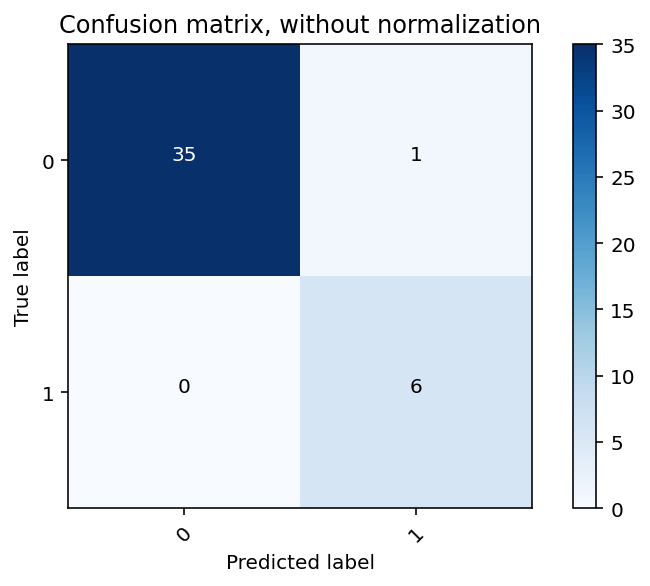

Normalized confusion matrix


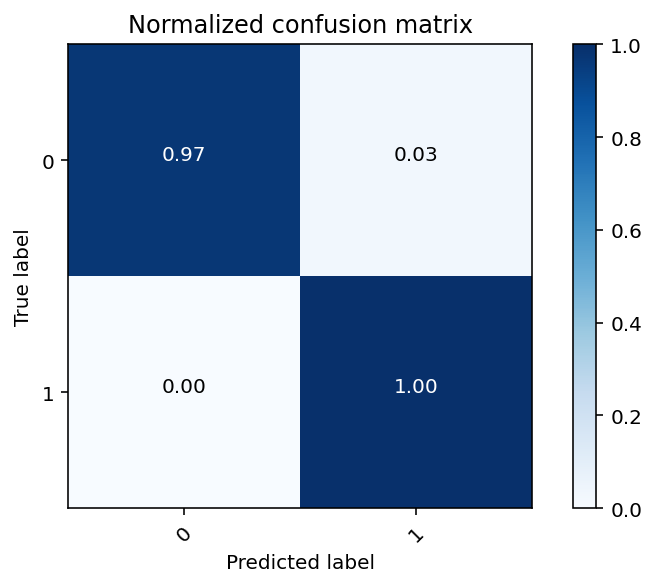

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
these_TSS_for_this_k = []
svmaccs=[]
recs=[]
precs=[]
recs=[]
skf = StratifiedKFold(n_splits=10)
for k,(j,i) in enumerate(skf.split(xdata_shuffled,ydata_shuffled)):
    train = xdata_shuffled[j]; test = xdata_shuffled[i]     # test is examples in testing set; train is examples in training set
    ytrain = ydata_shuffled[j]; ytest = ydata_shuffled[i]   # ytest is labels in testing set; ytrain is labels in training set
    svm.fit(train, ytrain)
    pred = svm.predict(test)
    TN,FP,TP,FN = confusion_table(pred, ydata_shuffled[i])
    if (((TP+FN) == 0.0) or (FP+TN)==0.0):
        these_TSS_for_this_k.append(-1.0)
        continue
    else:
        these_TSS_for_this_k.append(TP/(TP+FN) - FP/(FP+TN))
    print(TN,FP,TP,FN)
    svmacc = accuracy_score(ytest, pred)
    prec = precision_score(ytest, pred)
    rec = recall_score(ytest, pred)
    svmaccs.append(svmacc)
    precs.append(prec)
    recs.append(rec)
TSS_k = np.array(these_TSS_for_this_k)
array_of_avg_TSS=np.mean(TSS_k)
array_of_std_TSS=np.std(TSS_k)
print("The TSS equals",array_of_avg_TSS,'+/-',array_of_std_TSS)
svmaccuracy = np.mean(svmaccs)
print(np.mean(svmaccs),'+/-',np.std(svmaccs))
print(np.mean(precs),'+/-',np.std(precs))
print(np.mean(recs),'+/-',np.std(recs))
plot_confusion_matrix(pred, ytest)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


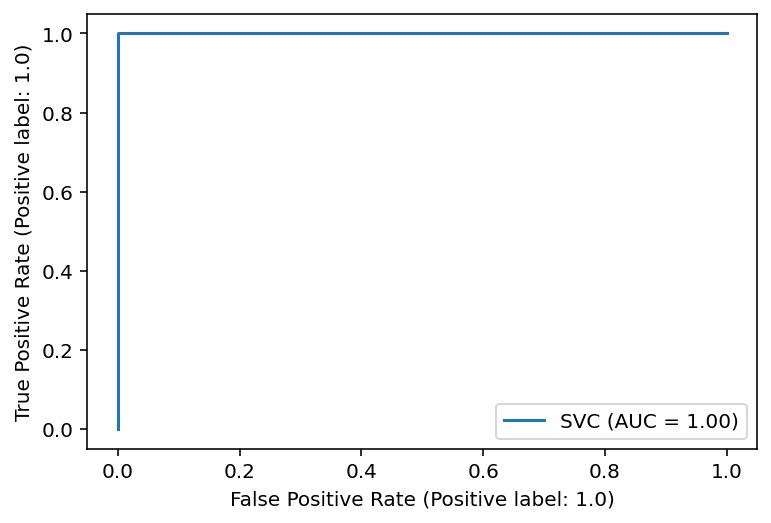

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(svm, test, ytest)
plt.show()

In [ ]:
method_names.append("SVC")
method_scores.append(svmaccuracy)


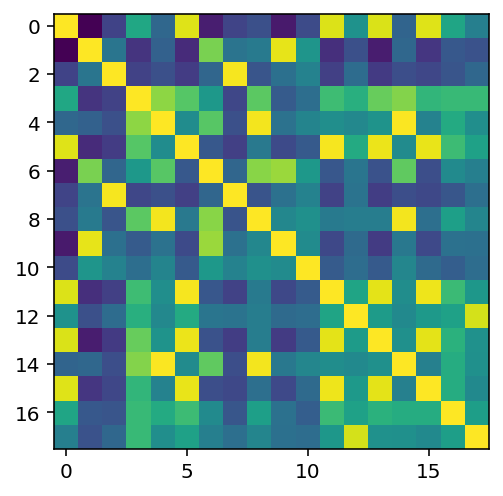

In [ ]:
##generating samples through GAN

# Check Correlations
# Note no correlations among PCA transformed columns, as expected
corr0 = pd.DataFrame(xdata_shuffled).corr()
plt.imshow(corr0) ;

In [ ]:
len(xdata_shuffled)

420